In [2]:
#!pip install fedot

In [1]:
import os
os.environ["MKL_NUM_THREADS"] = "4"
os.environ["NUMEXPR_NUM_THREADS"] = "4"
os.environ["OMP_NUM_THREADS"] = "4"

import torch
torch.set_num_threads(4)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import logging
logging.raiseExceptions = False

import fedot
from fedot.api.main import Fedot
from fedot.core.data.data import InputData
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import TsForecastingParams, Task, TaskTypesEnum
import inspect

In [3]:
from google.colab import files
uploaded = files.upload()

In [ ]:
ts_tabular =pd.read_csv('ts study 1.txt')
ts_real_temp = ts_tabular[ts_tabular['label']=='temp'].drop('label',axis=1)['value'].to_numpy()

In [4]:
def s1(n,noise = 3,sign=1):
    def f1(x):
        return 5*np.sin(x/20)+0.1*x-2*np.sqrt(x)
    trend = f1(np.array(range(n)))
    noise = np.random.normal(loc = 0, scale = noise,size = n)
    ans = {'ts':(trend+noise)*sign, 'trend' : trend*sign}
    return ans
def s2(length, periods = 10,noise = 0.3,sign=1 ):

    sinusoidal_data = np.linspace(-periods * np.pi, periods * np.pi, length)
    sinusoidal_data = np.sin(sinusoidal_data)
    cos_1_data = np.linspace(-periods * np.pi/2, periods/2 * np.pi/2, int(length/2))
    cos_1_data = np.cos(cos_1_data) 
    cos_2_data = np.linspace(periods/2 * np.pi/2, periods * np.pi/2, int(length/2))
    cos_2_data = np.cos(cos_2_data)   
    cosine_data = np.hstack((cos_1_data, cos_2_data))
    
    random_noise = np.random.normal(loc=0.0, scale=noise, size=length)
    synthetic_data = sinusoidal_data + cosine_data + random_noise
    ans = {'ts':synthetic_data*sign, 'trend': (sinusoidal_data + cosine_data)*sign}
    return ans
def s3(n,noise = 10,sign = 1):
    r = np.array(range(n))
    trend = (r-r/5*np.sin(r/2)+r/2*np.sin(r/20))/10
    noise = np.random.normal(loc=0,scale = noise,size = n)
    ans = {'ts':(trend+noise)*sign, 'trend': trend*sign}
    return ans
def s4(n,noise = 1,sign =1):
    array = np.array(range(n))
    trend = array/5+np.power(array,0.5)*np.sin(np.pi/12*array)
    noise = np.random.normal(loc = 0,scale = noise, size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign, 'trend' : trend*sign}
    return ans

def s5(n,noise = 1,sign=1):
    r= np.arange(n)
    trend = r*1
    noise = np.random.normal(loc=0,scale = noise,size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign,'trend':trend*sign}
    return ans

def s6(n,noise = 1, sign =1):
    r = np.arange(n)
    trend = 2*np.sin(2*r)+np.cos(r)
    noise = np.random.normal(loc = 0,scale  = noise,size = n)
    ts = trend+noise
    ans = {'ts':ts,'trend':trend}
    return ans

In [5]:
horizon = 25
validation_blocks = 2
task = Task(TaskTypesEnum.ts_forecasting,  TsForecastingParams(forecast_length=horizon))
start = 0
end = 1000
series = 2

if series == 'traffic':
    init_series = ts_real_temp
    ts = init_series[start:end]
    trend = None
    ts_test = init_series[end:end+horizon]
    trend_test = None
    idx = np.array(range(len(np.array(ts))))

if series ==1:
    noise = 0.5
    init_series = s1(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)

    
if series ==2:
    noise = 0.5
    init_series = s2(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    
if series ==3:
    noise = 0.5
    init_series = s3(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    
if series ==4:
    noise = 0.5
    init_series = s4(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
  
if series ==5:
    noise = 0.5
    init_series = s5(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    

if series ==6:
    noise = 0.5
    init_series = s6(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    

train_data, test_data = train_test_data_setup(train_input, validation_blocks=2)

# init model for the time series forecasting
model = Fedot(problem='ts_forecasting',
                  safe_mode = True,
                  task_params=task.task_params,
                  timeout=3,
                  n_jobs=-1,
                  cv_folds=2, 
                  validation_blocks=2, 
                  preset='ts',
                  with_tuning = False,
                  max_depth = 5,
                  num_of_generations  =3 ,
                  logging_level = 10,
                 show_progress =True)

DEBUG:tensorflow:Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.


2022-11-22 14:54:38,925 - Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.


DEBUG:h5py._conv:Creating converter from 7 to 5


2022-11-22 14:54:39,322 - Creating converter from 7 to 5


DEBUG:h5py._conv:Creating converter from 5 to 7


2022-11-22 14:54:39,330 - Creating converter from 5 to 7


DEBUG:h5py._conv:Creating converter from 7 to 5


2022-11-22 14:54:39,337 - Creating converter from 7 to 5


DEBUG:h5py._conv:Creating converter from 5 to 7


2022-11-22 14:54:39,342 - Creating converter from 5 to 7


DEBUG:root:Initializing MLIR with module: _site_initialize_0


2022-11-22 14:54:39,687 - Initializing MLIR with module: _site_initialize_0


DEBUG:root:Registering dialects from initializer <module 'jaxlib.mlir._mlir_libs._site_initialize_0' from '/usr/local/lib/python3.7/dist-packages/jaxlib/mlir/_mlir_libs/_site_initialize_0.so'>


2022-11-22 14:54:39,697 - Registering dialects from initializer <module 'jaxlib.mlir._mlir_libs._site_initialize_0' from '/usr/local/lib/python3.7/dist-packages/jaxlib/mlir/_mlir_libs/_site_initialize_0.so'>


DEBUG:jax._src.path:etils.epath found. Using etils.epath for file I/O.


2022-11-22 14:54:39,815 - etils.epath found. Using etils.epath for file I/O.


INFO:summarizer.preprocessing.cleaner:'pattern' package not found; tag filters are not available for English


2022-11-22 14:54:40,932 - 'pattern' package not found; tag filters are not available for English


In [6]:
#inspect.getmembers(model)

INFO:root:AssumptionsHandler - Initial pipeline fitting started


2022-11-22 14:54:45,637 - AssumptionsHandler - Initial pipeline fitting started


DEBUG:root:SecondaryNode - Trying to fit secondary node with operation: ridge


2022-11-22 14:54:45,645 - SecondaryNode - Trying to fit secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 14:54:45,651 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Trying to fit secondary node with operation: ridge


2022-11-22 14:54:45,656 - SecondaryNode - Trying to fit secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 14:54:45,659 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Trying to fit primary node with operation: lagged


2022-11-22 14:54:45,662 - PrimaryNode - Trying to fit primary node with operation: lagged


DEBUG:root:PrimaryNode - Trying to fit primary node with operation: glm


2022-11-22 14:54:45,774 - PrimaryNode - Trying to fit primary node with operation: glm


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 14:54:45,930 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 14:54:45,938 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 14:54:45,941 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 14:54:45,944 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Predict in primary node by operation: lagged


2022-11-22 14:54:45,947 - PrimaryNode - Predict in primary node by operation: lagged


DEBUG:root:PrimaryNode - Predict in primary node by operation: glm


2022-11-22 14:54:45,958 - PrimaryNode - Predict in primary node by operation: glm


INFO:root:AssumptionsHandler - Initial pipeline was fitted successfully


2022-11-22 14:54:45,972 - AssumptionsHandler - Initial pipeline was fitted successfully


CRITICAL:root:ApiComposer - Initial pipeline was fitted in 0.3 sec.


2022-11-22 14:54:45,980 - ApiComposer - Initial pipeline was fitted in 0.3 sec.


CRITICAL:root:ApiComposer - AutoML configured. Parameters tuning: False Time limit: 3 min Set of candidate models: ['ridge', 'pca', 'ets', 'locf', 'normalization', 'smoothing', 'lagged', 'ts_naive_average', 'diff_filter', 'sparse_lagged', 'linear', 'gaussian_filter', 'sgdr', 'scaling', 'ar', 'arima', 'polyfit', 'glm', 'stl_arima', 'lasso', 'cut', 'adareg', 'dtreg', 'fast_ica']


2022-11-22 14:54:46,011 - ApiComposer - AutoML configured. Parameters tuning: False Time limit: 3 min Set of candidate models: ['ridge', 'pca', 'ets', 'locf', 'normalization', 'smoothing', 'lagged', 'ts_naive_average', 'diff_filter', 'sparse_lagged', 'linear', 'gaussian_filter', 'sgdr', 'scaling', 'ar', 'arima', 'polyfit', 'glm', 'stl_arima', 'lasso', 'cut', 'adareg', 'dtreg', 'fast_ica']


CRITICAL:root:ApiComposer - Pipeline composition started.


2022-11-22 14:54:46,056 - ApiComposer - Pipeline composition started.


INFO:root:DataSourceSplitter - K-folds cross validation is applied.


2022-11-22 14:54:46,061 - DataSourceSplitter - K-folds cross validation is applied.


Generations:  33%|███▎      | 1/3 [00:00<?, ?gen/s]INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-11-22 14:54:46,073 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 1


2022-11-22 14:54:53,201 - EvoGraphOptimizer - Generation num: 1


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 0.5376274586669267, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


2022-11-22 14:54:53,214 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 0.5376274586669267, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


INFO:root:EvoGraphOptimizer - no improvements for 0 iterations


2022-11-22 14:54:53,223 - EvoGraphOptimizer - no improvements for 0 iterations


INFO:root:EvoGraphOptimizer - spent time: 0.1 min


2022-11-22 14:54:53,232 - EvoGraphOptimizer - spent time: 0.1 min


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-11-22 14:54:54,871 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 2


2022-11-22 14:55:41,969 - EvoGraphOptimizer - Generation num: 2


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 0.5276424159995865, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.7}]


2022-11-22 14:55:41,980 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 0.5276424159995865, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.7}]


INFO:root:EvoGraphOptimizer - no improvements for 0 iterations


2022-11-22 14:55:41,985 - EvoGraphOptimizer - no improvements for 0 iterations


INFO:root:EvoGraphOptimizer - spent time: 0.9 min


2022-11-22 14:55:41,996 - EvoGraphOptimizer - spent time: 0.9 min


INFO:root:EvoGraphOptimizer - Next population size: 34; max graph depth: 5


2022-11-22 14:55:41,999 - EvoGraphOptimizer - Next population size: 34; max graph depth: 5


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-11-22 14:55:42,920 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 3


2022-11-22 14:56:32,720 - EvoGraphOptimizer - Generation num: 3


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 0.5276424159995865, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.7}]


2022-11-22 14:56:32,728 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 0.5276424159995865, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.7}]


INFO:root:EvoGraphOptimizer - no improvements for 1 iterations


2022-11-22 14:56:32,733 - EvoGraphOptimizer - no improvements for 1 iterations


INFO:root:EvoGraphOptimizer - spent time: 1.8 min


2022-11-22 14:56:32,736 - EvoGraphOptimizer - spent time: 1.8 min


INFO:root:EvoGraphOptimizer - Next population size: 55; max graph depth: 5


2022-11-22 14:56:32,740 - EvoGraphOptimizer - Next population size: 55; max graph depth: 5


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 2


2022-11-22 14:56:34,006 - MultiprocessingDispatcher - Number of used CPU's: 2


INFO:root:EvoGraphOptimizer - Generation num: 4


2022-11-22 14:56:58,083 - EvoGraphOptimizer - Generation num: 4


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 0.5276424159995865, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.7}]


2022-11-22 14:56:58,090 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 0.5276424159995865, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.7}]


INFO:root:EvoGraphOptimizer - no improvements for 2 iterations


2022-11-22 14:56:58,097 - EvoGraphOptimizer - no improvements for 2 iterations


INFO:root:EvoGraphOptimizer - spent time: 2.2 min


2022-11-22 14:56:58,101 - EvoGraphOptimizer - spent time: 2.2 min


CRITICAL:root:GroupedCondition - Optimisation stopped: Max number of generations reached


2022-11-22 14:56:58,107 - GroupedCondition - Optimisation stopped: Max number of generations reached


Generations:  33%|███▎      | 1/3 [02:12<?, ?gen/s]
INFO:root:OptimisationTimer - Composition time: 2.201 min


2022-11-22 14:56:58,112 - OptimisationTimer - Composition time: 2.201 min


INFO:root:GPComposer - GP composition finished


2022-11-22 14:56:58,119 - GPComposer - GP composition finished


CRITICAL:root:ApiComposer - Model generation finished


2022-11-22 14:56:58,527 - ApiComposer - Model generation finished


CRITICAL:root:FEDOT logger - Final pipeline was fitted


2022-11-22 14:56:59,244 - FEDOT logger - Final pipeline was fitted


CRITICAL:root:FEDOT logger - Final pipeline: {'depth': 6, 'length': 7, 'nodes': [sgdr, ridge, glm, ridge, lagged, linear, decompose]}


2022-11-22 14:56:59,256 - FEDOT logger - Final pipeline: {'depth': 6, 'length': 7, 'nodes': [sgdr, ridge, glm, ridge, lagged, linear, decompose]}


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: sgdr


2022-11-22 14:56:59,265 - SecondaryNode - Obtain prediction in secondary node with operation: sgdr


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: sgdr


2022-11-22 14:56:59,273 - SecondaryNode - Fit all parent nodes in secondary node with operation: sgdr


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: linear


2022-11-22 14:56:59,281 - SecondaryNode - Obtain prediction in secondary node with operation: linear


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: linear


2022-11-22 14:56:59,288 - SecondaryNode - Fit all parent nodes in secondary node with operation: linear


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: decompose


2022-11-22 14:56:59,296 - SecondaryNode - Obtain prediction in secondary node with operation: decompose


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: decompose


2022-11-22 14:56:59,304 - SecondaryNode - Fit all parent nodes in secondary node with operation: decompose


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 14:56:59,312 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 14:56:59,319 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 14:56:59,322 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 14:56:59,329 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Predict in primary node by operation: lagged


2022-11-22 14:56:59,337 - PrimaryNode - Predict in primary node by operation: lagged


DEBUG:root:PrimaryNode - Predict in primary node by operation: glm


2022-11-22 14:56:59,347 - PrimaryNode - Predict in primary node by operation: glm


DEBUG:root:PrimaryNode - Predict in primary node by operation: lagged


2022-11-22 14:56:59,358 - PrimaryNode - Predict in primary node by operation: lagged


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 14:56:59,370 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 14:56:59,374 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 14:56:59,377 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 14:56:59,381 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Predict in primary node by operation: lagged


2022-11-22 14:56:59,384 - PrimaryNode - Predict in primary node by operation: lagged


DEBUG:root:PrimaryNode - Predict in primary node by operation: glm


2022-11-22 14:56:59,393 - PrimaryNode - Predict in primary node by operation: glm


2022-11-22 14:56:59,480 - OperationTypesRepository - Operation lagged not found in the repository


2022-11-22 14:56:59,485 - OperationTypesRepository - Operation decompose not found in the repository


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:56:59,632 - update_title_pos


DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=8.0 to DejaVu Sans ('/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


2022-11-22 14:56:59,676 - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=8.0 to DejaVu Sans ('/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:56:59,715 - update_title_pos


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:57:00,512 - update_title_pos


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:57:00,584 - update_title_pos


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:57:00,661 - update_title_pos


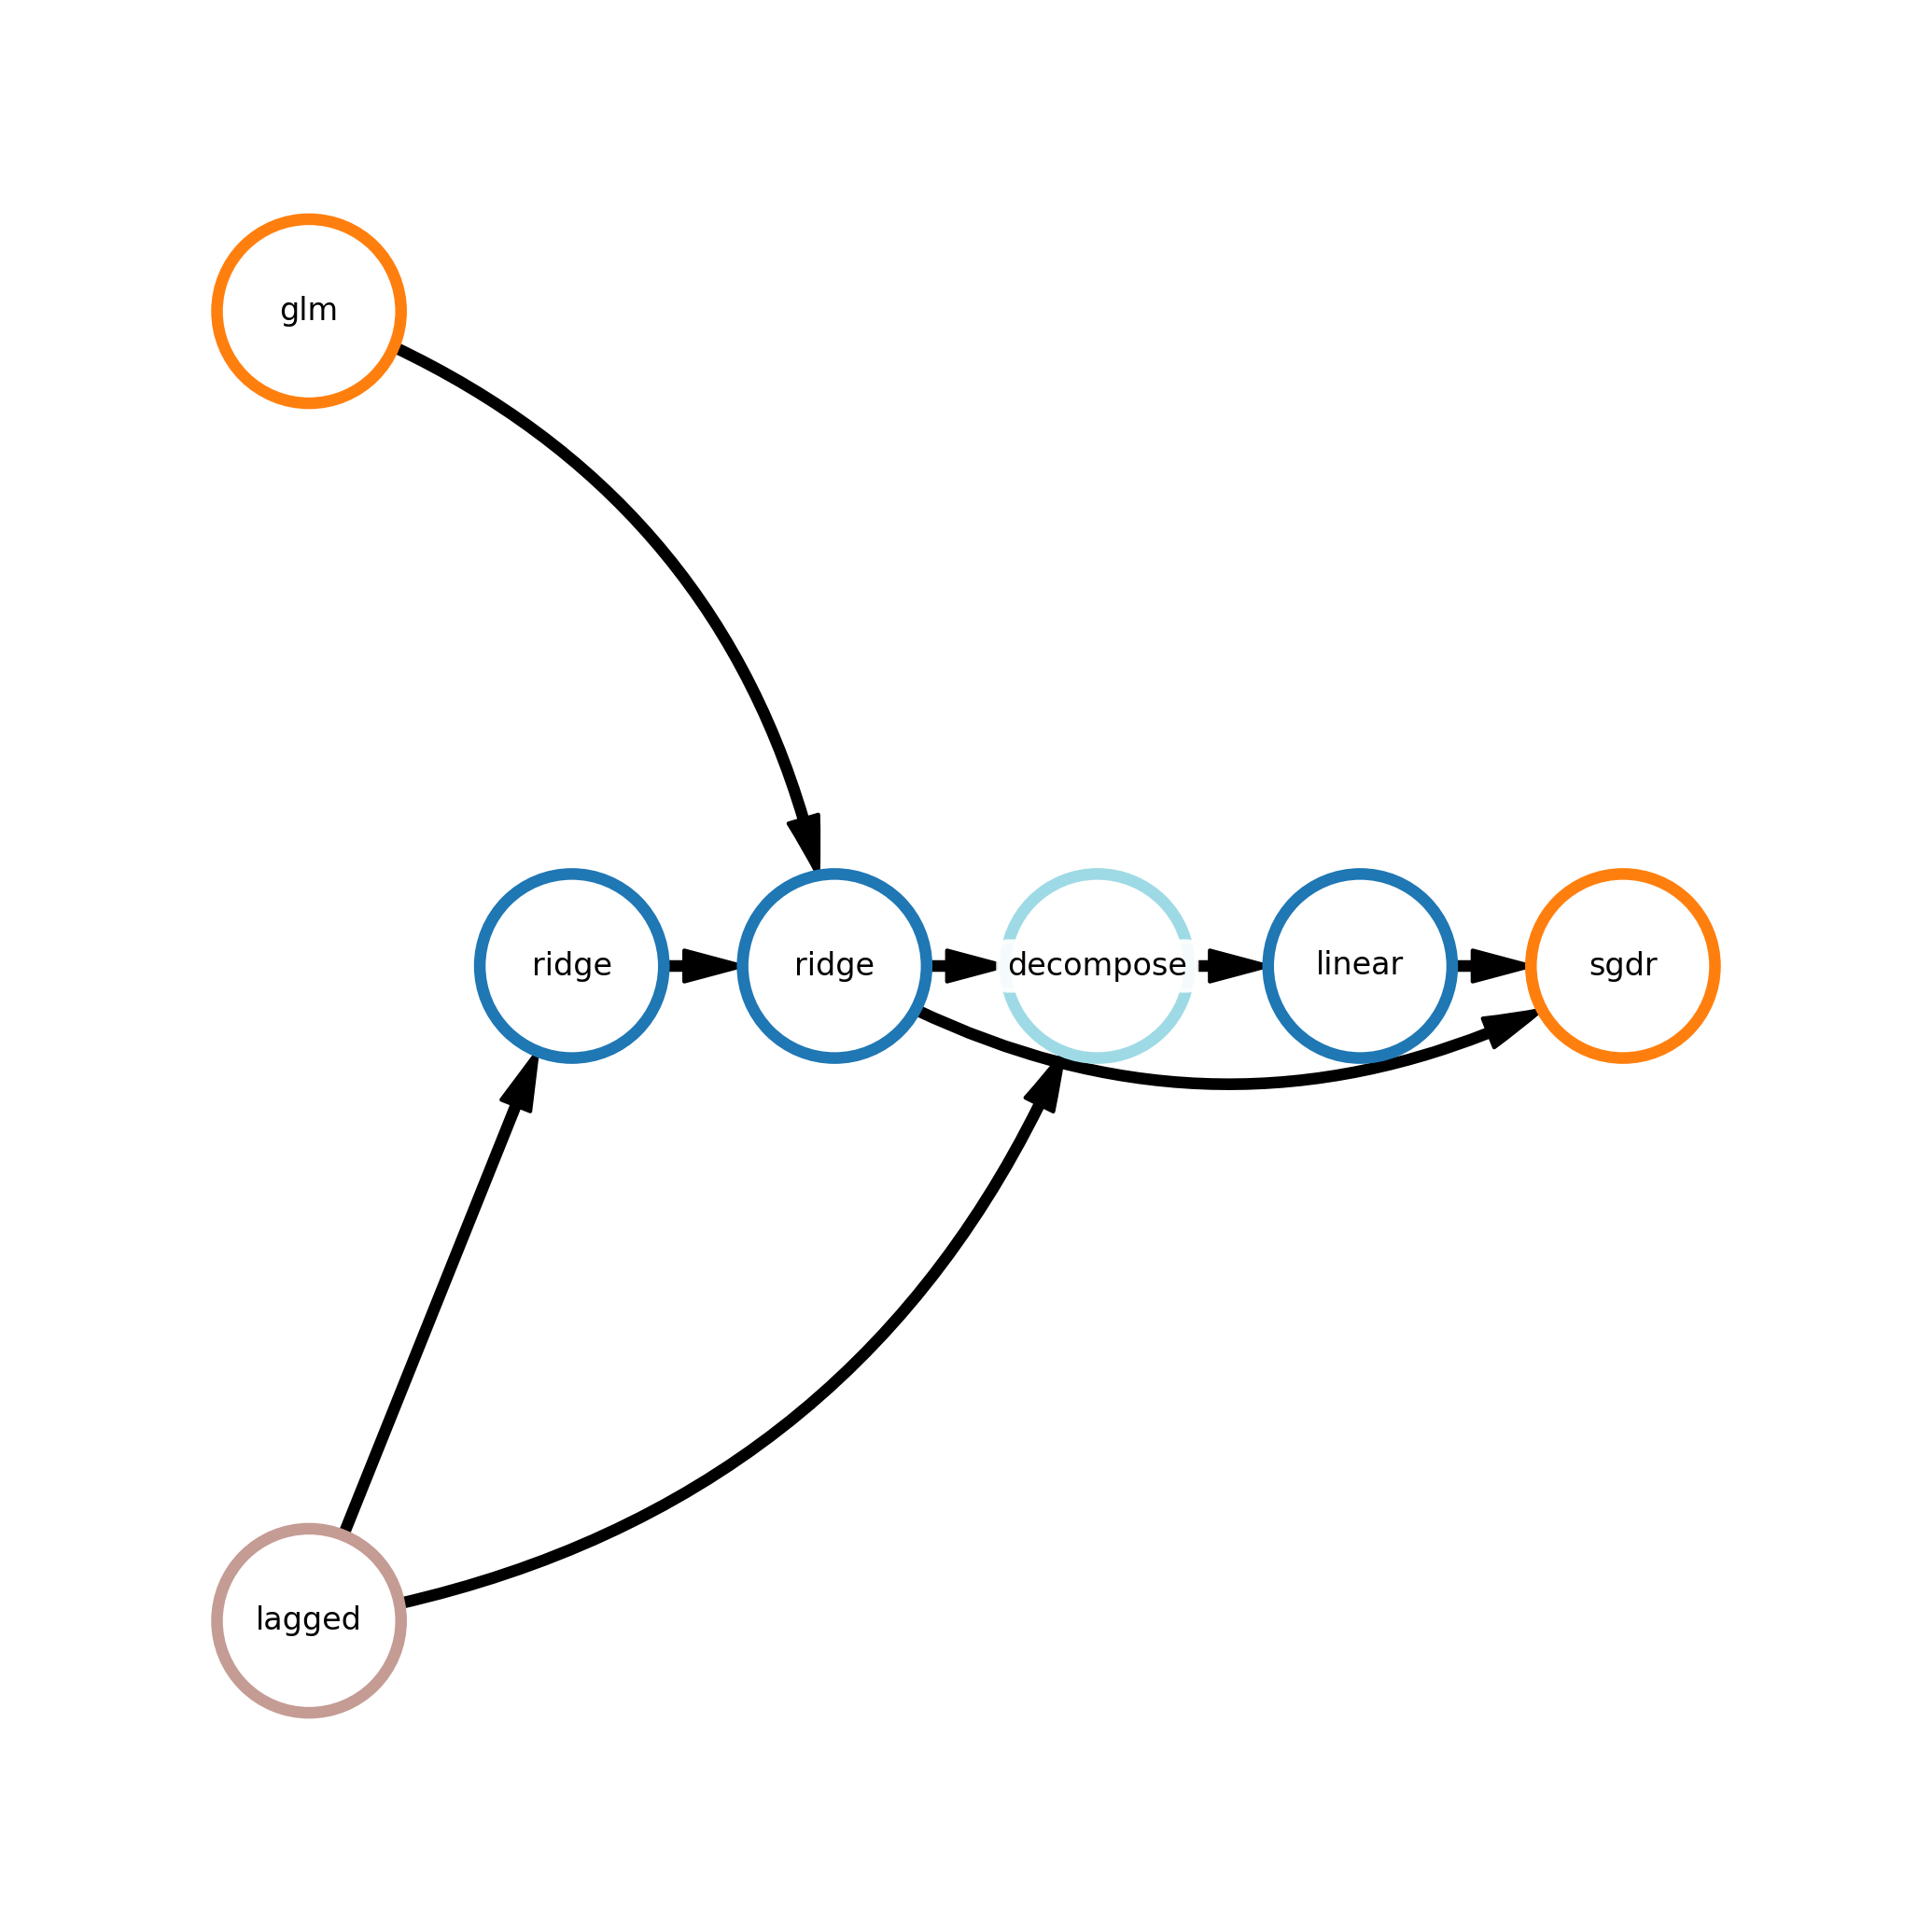

In [7]:
pipeline = model.fit(train_data)
forecast = model.forecast(test_data)
pipeline.show()

DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:57:15,643 - update_title_pos


DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


2022-11-22 14:57:15,660 - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:57:15,728 - update_title_pos


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:57:15,788 - update_title_pos


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:57:15,962 - update_title_pos


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:57:16,016 - update_title_pos


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:57:16,045 - update_title_pos


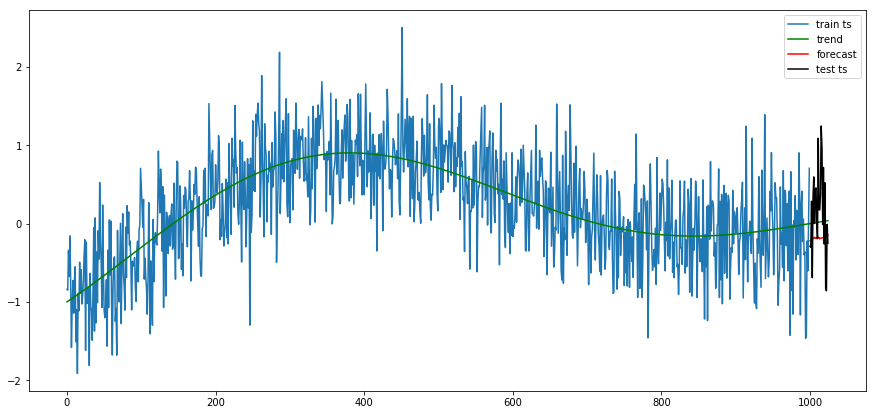

DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:57:16,209 - update_title_pos


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:57:16,375 - update_title_pos


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:57:16,419 - update_title_pos


DEBUG:matplotlib.axes._base:update_title_pos


2022-11-22 14:57:16,450 - update_title_pos


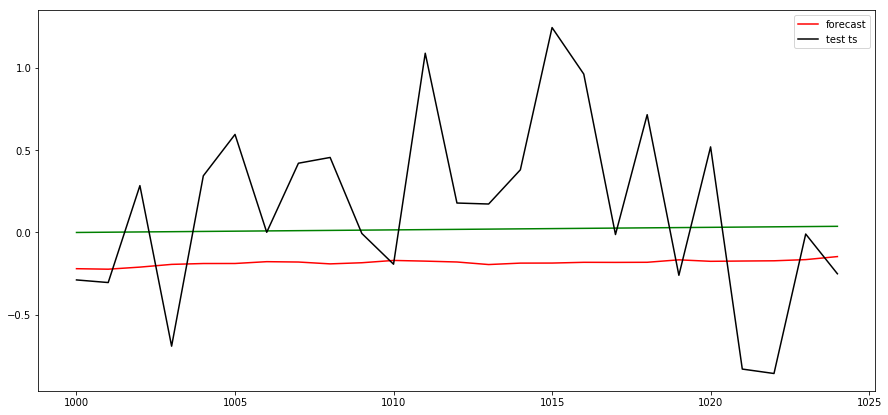

In [8]:
fig,ax  = plt.subplots()
fig.set(figwidth = 15,figheight = 7)
test_range = range(len(ts), len(ts)+len(ts_test))
test_range = range(end,end+horizon)
train_range = range(start,end)
total_range = range(start,end+horizon)

ax.plot(train_range,ts, label = 'train ts')
if trend is not None:
    ax.plot(train_range, trend,color = 'green',label = 'trend')
if trend_test is not None:
    ax.plot(test_range, trend_test,color = 'green')
ax.plot(test_range,forecast, color = 'red', label = 'forecast')
ax.plot(test_range, ts_test,color = 'black', label = 'test ts')
plt.legend();

fig1,ax1 = plt.subplots()
fig1.set(figwidth = 15,figheight = 7)

if trend_test is not None:
    ax1.plot(test_range, trend_test,color = 'green')
ax1.plot(test_range,forecast, color = 'red', label = 'forecast')
ax1.plot(test_range, ts_test,color = 'black', label = 'test ts')
plt.legend();

In [9]:
import sys
from sklearn.metrics import mean_squared_error as mse
from fedot.core.composer.metrics import QualityMetric
from fedot.core.data.data import InputData, OutputData
from fedot.core.repository.tasks import TsForecastingParams

def quantile_loss(y_true, y_pred, quantile=0.5):
    res = np.array(y_true)-np.array(y_pred)
    metrics=np.empty(shape = [0])
    for x in res:
        if x>=0:
            metrics = np.append(metrics, quantile*x)
        else:
            metrics = np.append(metrics,(quantile-1)*x)
    return np.mean(metrics)

class Quantile_Loss_1(QualityMetric):
    default_value = sys.maxsize

    @staticmethod
    def metric(reference: InputData, predicted: OutputData) -> float:
        value = quantile_loss(reference.target, predicted.predict,quantile = 0.1)
        return value


class Quantile_Loss_9(QualityMetric):
    default_value = sys.maxsize

    @staticmethod
    def metric(reference: InputData, predicted: OutputData) -> float:
        value = quantile_loss(reference.target, predicted.predict,quantile = 0.9)
        return value

In [10]:
#importing for tuning
from fedot.core.optimisers.adapters import PipelineAdapter
from fedot.core.pipelines.tuning.tuner_builder import TunerBuilder
from fedot.core.repository.quality_metrics_repository import RegressionMetricsEnum
from fedot.core.pipelines.tuning.tuner_interface import HyperoptTuner
from fedot.core.pipelines.tuning.unified import PipelineTuner
from fedot.core.optimisers.composer_requirements import ComposerRequirements
import datetime

from fedot.core.repository.quality_metrics_repository import RegressionMetricsEnum

#these parameters are the same for both tuners below
task = Task(TaskTypesEnum.ts_forecasting,TsForecastingParams(forecast_length=horizon))
composer_requirements = ComposerRequirements()
composer_requirements.validation_blocks = 2
composer_requirements.n_jobs= -1
composer_requirements.show_progress = True

#this tuner will be used to create lower confidence interval
low_tuner = TunerBuilder(task = task) \
         .with_tuner(PipelineTuner) \
         .with_metric(Quantile_Loss_1.get_value) \
         .with_iterations(10) \
         .with_timeout(datetime.timedelta(minutes=2)) \
         .with_requirements(composer_requirements) \
         .build(train_data)

#this tuner will be used to create uppper confidence interval
up_tuner = TunerBuilder(task = task) \
         .with_tuner(PipelineTuner) \
         .with_metric(Quantile_Loss_9.get_value) \
         .with_iterations(10) \
         .with_timeout(datetime.timedelta(minutes=2)) \
         .with_requirements(composer_requirements) \
         .build(train_data)

INFO:root:DataSourceSplitter - Hold out validation is applied.


2022-11-22 14:57:48,876 - DataSourceSplitter - Hold out validation is applied.


INFO:root:DataSourceSplitter - Hold out validation is applied.


2022-11-22 14:57:48,883 - DataSourceSplitter - Hold out validation is applied.


In [11]:
def quantile_maker(quantile,arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    up = []
    low = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        q_up = np.quantile(x, 1-quantile)
        up.append(q_up)
        q_low = np.quantile(x,quantile)
        low.append(q_low)
    up = np.array(up)
    low = np.array(low)
    return {'up':up,'low':low}

def mean_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    average = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        average.append(x.mean())
    return average

def median_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    median = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        median.append(np.median(x))
    return median

def absolute_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    maximum = []
    minimum = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        maximum.append(np.max(x))
        minimum.append(np.min(x))
    return {'up':np.array(maximum),'low':np.array(minimum)}

from scipy.stats import trim_mean
def truncated_mean_maker(arrays, quantile=0.1):
    number_arrays = len(arrays)
    l = len(arrays[0])
    trunc_mean = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        trunc_mean.append(trim_mean(x, quantile))
    return np.array(trunc_mean)

In [12]:
def conf_int_maker(model = model,
                   train_ts = ts,
                   number_models = 10, 
                   pipelines_show= False):
    """
    model - a fedot model of interest
    train_ts - the ts used for training the model
    ts_test - the testing series; used for plotting and visualization of the results
    number_models - number of models used to create the confidence intervals
    regim - type of getting lower and upper confidence intervals from the upper and lower arrays; 
            default is 'quantile' also avaliable 'average' and 'median', 'absolute_bounds', 'truncated_mean'
    plot - boolean parameter indicating wheter to show plot of the forecast and confidence intervals
    plot_history - boolean parameter indicating whether to show previous series
    """
    
    horizon = model.params.task.task_params.forecast_length
    train_data = model.train_data
    test_data = model.test_data
    forecast = model.predict(test_data)

    #4 lines below allow us take the best models
    fits = []
    for ind in model.history.individuals[-1]:
        fits.append(ind.fitness.value)
    fits = np.sort(np.array(fits))

    #create up and low predictions
    up_predictions = []
    low_predictions = []
    
    s=1
    for ind in model.history.individuals[-1]:
        if ind.fitness.value<=fits[number_models]:
            pipeline = PipelineAdapter().restore(ind.graph)
            print(f'Fitting pipeline №{s}')
            s+=1
            if pipelines_show:
                pipeline.show()
            
            
            #tuning upper confidence interval
            tuned_pipeline = up_tuner.tune(pipeline)
            tuned_pipeline.fit(train_data)
            preds = tuned_pipeline.predict(test_data).predict.ravel()
            up_predictions.append(preds)
            del tuned_pipeline
            
            #tuning lower confidence interval
            tuned_pipeline = low_tuner.tune(pipeline)
            tuned_pipeline.fit(train_data)
            preds = tuned_pipeline.predict(test_data).predict.ravel()
            low_predictions.append(preds)
            del tuned_pipeline
    return {'up_predictions':up_predictions, 'low_predictions':low_predictions}

In [13]:
def conf_int_plotting(up_predictions,
                      low_predictions,
                      horizon=horizon,
                      forecast=forecast,
                      ts=ts,
                      ts_test=ts_test,
                      trend_test=trend_test,
                      regim = 'quantile',
                      plot_history = True,
                      plot_up_int = True,
                      plot_low_int = True,
                      plot_trend = True,
                      plot_forecast = True,
                      plot_upper_train = True,
                      plot_lower_train = True,
                      plot_ts_test = True):
    if regim == 'quantile':
        up_res= quantile_maker(quantile = 0.1, arrays = up_predictions)['up']
        low_res= quantile_maker(quantile = 0.1, arrays = low_predictions)['low']
    if regim == 'mean':
        up_res = mean_maker(arrays = up_predictions)
        low_res = mean_maker(arrays = low_predictions)
    if regim == 'median':
        up_res = median_maker(arrays = up_predictions)
        low_res = median_maker(arrays = low_predictions)
    if regim == 'absolute_bounds':
        up_res = absolute_maker(arrays = up_predictions)['up']
        low_res = absolute_maker(arrays = low_predictions)['low']
    if regim == 'truncated_mean':
        up_res = truncated_mean_maker(arrays = up_predictions)
        low_res = truncated_mean_maker(arrays = low_predictions)
    
    up = np.maximum(up_res,forecast)  
    low = np.minimum(low_res,forecast)

    r = range(1,horizon+1)
    fig,ax = plt.subplots()
    fig.set(figwidth = 15,figheight = 7)
    for i in range(len(up_predictions)):
        if i==0:
            if plot_upper_train:
                ax.plot(r,up_predictions[i], color = 'yellow',label = 'preds for up train')
            if plot_lower_train:
                ax.plot(r,low_predictions[i], color = 'pink',label = 'preds for low train')
        else:
            if plot_upper_train:
                ax.plot(r,up_predictions[i], color = 'yellow')
            if plot_lower_train:
                ax.plot(r,low_predictions[i], color = 'pink')    
    if plot_up_int:
        ax.plot(r,up, color = 'blue', label  = 'Up',marker= '.')
    if plot_low_int:
        ax.plot(r,low, color = 'green', label  = 'Low',marker = '.')
    if plot_forecast:
        ax.plot(r,forecast, color = 'red', label = 'Forecast')
    if ts_test is not None:
        if plot_ts_test:
            ax.plot(r,ts_test,color = 'black', label = 'Actual TS')
    if trend_test is not None:
        if plot_trend:
            ax.plot(r, trend_test, color = 'magenta', label = 'True Trend')
    plt.legend()
    if plot_history:
        fig1,ax1 = plt.subplots()
        
        fig1.set(figwidth = 15,figheight = 7)
       
        train_range = range(len(ts))
        test_range = range(len(ts),len(ts)+horizon)
        
        ax1.plot(train_range,ts, color = 'gray',label = 'Train ts')
        ax1.plot(test_range, up,color = 'blue', label = 'Up')
        ax1.plot(test_range, low,color = 'green', label = 'Low')
        ax1.plot(test_range,forecast, color = 'red', label = 'Forecast')
        if ts_test is not None:
            ax1.plot(test_range, ts_test,color = 'black', label = 'Actual TS')  
        if trend_test is not None:
            ax1.plot(test_range, trend_test, color = 'magenta', label = 'True Trend')
        plt.legend();

In [14]:
x = conf_int_maker(model = model, number_models = 10,pipelines_show = False)

INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №1
2022-11-22 14:57:57,431 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005949 seconds


2022-11-22 14:57:58,141 - build_posterior_wrapper took 0.005949 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 14:57:58,148 - TPE using 0 trials
 10%|█         | 1/10 [00:02<00:22,  2.48s/trial, best loss: 0.2923255629674388]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006432 seconds


2022-11-22 14:58:00,624 - build_posterior_wrapper took 0.006432 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.292326


2022-11-22 14:58:00,630 - TPE using 1/1 trials with best loss 0.292326
 20%|██        | 2/10 [00:05<00:22,  2.81s/trial, best loss: 0.2923255629674388]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007620 seconds


2022-11-22 14:58:03,677 - build_posterior_wrapper took 0.007620 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.292326


2022-11-22 14:58:03,689 - TPE using 2/2 trials with best loss 0.292326
 30%|███       | 3/10 [00:08<00:21,  3.02s/trial, best loss: 0.2923255629674388]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007428 seconds


2022-11-22 14:58:06,931 - build_posterior_wrapper took 0.007428 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.292326


2022-11-22 14:58:06,938 - TPE using 3/3 trials with best loss 0.292326
 40%|████      | 4/10 [00:10<00:14,  2.43s/trial, best loss: 0.1880724792265349]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015094 seconds


2022-11-22 14:58:08,467 - build_posterior_wrapper took 0.015094 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.188072


2022-11-22 14:58:08,474 - TPE using 4/4 trials with best loss 0.188072
 50%|█████     | 5/10 [00:13<00:13,  2.66s/trial, best loss: 0.1880724792265349]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006554 seconds


2022-11-22 14:58:11,533 - build_posterior_wrapper took 0.006554 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.188072


2022-11-22 14:58:11,546 - TPE using 5/5 trials with best loss 0.188072
 60%|██████    | 6/10 [00:17<00:11,  3.00s/trial, best loss: 0.1880724792265349]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007038 seconds


2022-11-22 14:58:15,184 - build_posterior_wrapper took 0.007038 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.188072


2022-11-22 14:58:15,200 - TPE using 6/6 trials with best loss 0.188072
 70%|███████   | 7/10 [00:21<00:10,  3.46s/trial, best loss: 0.1880724792265349]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009694 seconds


2022-11-22 14:58:19,602 - build_posterior_wrapper took 0.009694 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.188072


2022-11-22 14:58:19,610 - TPE using 7/7 trials with best loss 0.188072
 80%|████████  | 8/10 [00:22<00:05,  2.71s/trial, best loss: 0.18580873917419422]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006415 seconds


2022-11-22 14:58:20,694 - build_posterior_wrapper took 0.006415 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.185809


2022-11-22 14:58:20,704 - TPE using 8/8 trials with best loss 0.185809
 90%|█████████ | 9/10 [00:24<00:02,  2.59s/trial, best loss: 0.18580873917419422]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009722 seconds


2022-11-22 14:58:23,026 - build_posterior_wrapper took 0.009722 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.185809


2022-11-22 14:58:23,040 - TPE using 9/9 trials with best loss 0.185809
100%|██████████| 10/10 [00:27<00:00,  2.76s/trial, best loss: 0.18580873917419422]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 14:58:26,648 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.186 equal or better than initial (+ 5% deviation) 0.224


2022-11-22 14:58:26,652 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.186 equal or better than initial (+ 5% deviation) 0.224


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 14:58:27,438 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006607 seconds


2022-11-22 14:58:28,389 - build_posterior_wrapper took 0.006607 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 14:58:28,407 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:08,  1.07trial/s, best loss: 0.18836434276148906]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009078 seconds


2022-11-22 14:58:29,332 - build_posterior_wrapper took 0.009078 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.188364


2022-11-22 14:58:29,341 - TPE using 1/1 trials with best loss 0.188364
 20%|██        | 2/10 [00:02<00:11,  1.39s/trial, best loss: 0.18836434276148906]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009870 seconds


2022-11-22 14:58:31,047 - build_posterior_wrapper took 0.009870 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.188364


2022-11-22 14:58:31,064 - TPE using 2/2 trials with best loss 0.188364
 30%|███       | 3/10 [00:05<00:13,  1.89s/trial, best loss: 0.16671666877398977]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006721 seconds


2022-11-22 14:58:33,514 - build_posterior_wrapper took 0.006721 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.166717


2022-11-22 14:58:33,521 - TPE using 3/3 trials with best loss 0.166717
 40%|████      | 4/10 [00:06<00:09,  1.55s/trial, best loss: 0.16671666877398977]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006645 seconds


2022-11-22 14:58:34,558 - build_posterior_wrapper took 0.006645 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.166717


2022-11-22 14:58:34,565 - TPE using 4/4 trials with best loss 0.166717
 50%|█████     | 5/10 [00:08<00:08,  1.72s/trial, best loss: 0.16304552827319627]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006456 seconds


2022-11-22 14:58:36,587 - build_posterior_wrapper took 0.006456 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.163046


2022-11-22 14:58:36,594 - TPE using 5/5 trials with best loss 0.163046
 60%|██████    | 6/10 [00:09<00:05,  1.47s/trial, best loss: 0.16304552827319627]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007724 seconds


2022-11-22 14:58:37,558 - build_posterior_wrapper took 0.007724 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.163046


2022-11-22 14:58:37,564 - TPE using 6/6 trials with best loss 0.163046
 70%|███████   | 7/10 [00:11<00:05,  1.90s/trial, best loss: 0.16304552827319627]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006440 seconds


2022-11-22 14:58:40,334 - build_posterior_wrapper took 0.006440 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.163046


2022-11-22 14:58:40,340 - TPE using 7/7 trials with best loss 0.163046
 80%|████████  | 8/10 [00:13<00:03,  1.75s/trial, best loss: 0.16304552827319627]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006048 seconds


2022-11-22 14:58:41,774 - build_posterior_wrapper took 0.006048 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.163046


2022-11-22 14:58:41,780 - TPE using 8/8 trials with best loss 0.163046
 90%|█████████ | 9/10 [00:16<00:02,  2.19s/trial, best loss: 0.16304552827319627]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007094 seconds


2022-11-22 14:58:44,934 - build_posterior_wrapper took 0.007094 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.163046


2022-11-22 14:58:44,945 - TPE using 9/9 trials with best loss 0.163046
100%|██████████| 10/10 [00:17<00:00,  1.79s/trial, best loss: 0.16304552827319627]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 14:58:48,360 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.166 equal or better than initial (+ 5% deviation) 0.264


2022-11-22 14:58:48,364 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.166 equal or better than initial (+ 5% deviation) 0.264


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №2
2022-11-22 14:58:50,174 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006026 seconds


2022-11-22 14:58:50,916 - build_posterior_wrapper took 0.006026 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 14:58:50,924 - TPE using 0 trials
 10%|█         | 1/10 [00:03<00:30,  3.43s/trial, best loss: 0.6572963914387076]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008456 seconds


2022-11-22 14:58:54,361 - build_posterior_wrapper took 0.008456 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.657296


2022-11-22 14:58:54,378 - TPE using 1/1 trials with best loss 0.657296
 20%|██        | 2/10 [00:05<00:21,  2.69s/trial, best loss: 0.2976399843688804]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.022376 seconds


2022-11-22 14:58:56,533 - build_posterior_wrapper took 0.022376 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.297640


2022-11-22 14:58:56,554 - TPE using 2/2 trials with best loss 0.297640
 30%|███       | 3/10 [00:08<00:20,  2.96s/trial, best loss: 0.2976399843688804]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007402 seconds


2022-11-22 14:58:59,810 - build_posterior_wrapper took 0.007402 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.297640


2022-11-22 14:58:59,842 - TPE using 3/3 trials with best loss 0.297640
 40%|████      | 4/10 [00:11<00:17,  2.87s/trial, best loss: 0.27661044680070385]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.017274 seconds


2022-11-22 14:59:02,548 - build_posterior_wrapper took 0.017274 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.276610


2022-11-22 14:59:02,564 - TPE using 4/4 trials with best loss 0.276610
 50%|█████     | 5/10 [00:13<00:12,  2.58s/trial, best loss: 0.27661044680070385]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006764 seconds


2022-11-22 14:59:04,600 - build_posterior_wrapper took 0.006764 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.276610


2022-11-22 14:59:04,617 - TPE using 5/5 trials with best loss 0.276610
 60%|██████    | 6/10 [00:15<00:09,  2.29s/trial, best loss: 0.2131512165051154] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010766 seconds


2022-11-22 14:59:06,318 - build_posterior_wrapper took 0.010766 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.213151


2022-11-22 14:59:06,325 - TPE using 6/6 trials with best loss 0.213151
 70%|███████   | 7/10 [00:16<00:05,  1.98s/trial, best loss: 0.2003069524825022]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010054 seconds


2022-11-22 14:59:07,663 - build_posterior_wrapper took 0.010054 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.200307


2022-11-22 14:59:07,681 - TPE using 7/7 trials with best loss 0.200307
 80%|████████  | 8/10 [00:20<00:05,  2.70s/trial, best loss: 0.2003069524825022]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011083 seconds


2022-11-22 14:59:11,908 - build_posterior_wrapper took 0.011083 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.200307


2022-11-22 14:59:11,918 - TPE using 8/8 trials with best loss 0.200307
 90%|█████████ | 9/10 [00:22<00:02,  2.34s/trial, best loss: 0.19127482500271653]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007954 seconds


2022-11-22 14:59:13,467 - build_posterior_wrapper took 0.007954 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.191275


2022-11-22 14:59:13,474 - TPE using 9/9 trials with best loss 0.191275
100%|██████████| 10/10 [00:26<00:00,  2.64s/trial, best loss: 0.19127482500271653]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 14:59:18,782 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.190 equal or better than initial (+ 5% deviation) 0.225


2022-11-22 14:59:18,798 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.190 equal or better than initial (+ 5% deviation) 0.225


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 14:59:20,202 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008459 seconds


2022-11-22 14:59:21,732 - build_posterior_wrapper took 0.008459 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 14:59:21,743 - TPE using 0 trials
 10%|█         | 1/10 [00:02<00:23,  2.61s/trial, best loss: 0.18199118150095475]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006400 seconds


2022-11-22 14:59:24,338 - build_posterior_wrapper took 0.006400 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.181991


2022-11-22 14:59:24,351 - TPE using 1/1 trials with best loss 0.181991
 20%|██        | 2/10 [00:04<00:18,  2.28s/trial, best loss: 0.1638026044534872] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009495 seconds


2022-11-22 14:59:26,397 - build_posterior_wrapper took 0.009495 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.163803


2022-11-22 14:59:26,401 - TPE using 2/2 trials with best loss 0.163803
 30%|███       | 3/10 [00:07<00:17,  2.52s/trial, best loss: 0.1638026044534872]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009816 seconds


2022-11-22 14:59:29,191 - build_posterior_wrapper took 0.009816 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.163803


2022-11-22 14:59:29,211 - TPE using 3/3 trials with best loss 0.163803
 40%|████      | 4/10 [00:08<00:12,  2.08s/trial, best loss: 0.1638026044534872]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011955 seconds


2022-11-22 14:59:30,601 - build_posterior_wrapper took 0.011955 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.163803


2022-11-22 14:59:30,611 - TPE using 4/4 trials with best loss 0.163803
 50%|█████     | 5/10 [00:11<00:11,  2.30s/trial, best loss: 0.1638026044534872]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013878 seconds


2022-11-22 14:59:33,306 - build_posterior_wrapper took 0.013878 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.163803


2022-11-22 14:59:33,322 - TPE using 5/5 trials with best loss 0.163803
 60%|██████    | 6/10 [00:16<00:12,  3.20s/trial, best loss: 0.1638026044534872]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006271 seconds


2022-11-22 14:59:38,237 - build_posterior_wrapper took 0.006271 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.163803


2022-11-22 14:59:38,243 - TPE using 6/6 trials with best loss 0.163803
 70%|███████   | 7/10 [00:19<00:09,  3.25s/trial, best loss: 0.1638026044534872]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006805 seconds


2022-11-22 14:59:41,589 - build_posterior_wrapper took 0.006805 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.163803


2022-11-22 14:59:41,600 - TPE using 7/7 trials with best loss 0.163803
 80%|████████  | 8/10 [00:20<00:04,  2.48s/trial, best loss: 0.1638026044534872]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007069 seconds


2022-11-22 14:59:42,425 - build_posterior_wrapper took 0.007069 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.163803


2022-11-22 14:59:42,432 - TPE using 8/8 trials with best loss 0.163803
 90%|█████████ | 9/10 [00:21<00:01,  1.98s/trial, best loss: 0.1638026044534872]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006739 seconds


2022-11-22 14:59:43,293 - build_posterior_wrapper took 0.006739 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.163803


2022-11-22 14:59:43,304 - TPE using 9/9 trials with best loss 0.163803
100%|██████████| 10/10 [00:23<00:00,  2.32s/trial, best loss: 0.1638026044534872]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 14:59:46,946 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.164 equal or better than initial (+ 5% deviation) 0.262


2022-11-22 14:59:46,963 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.164 equal or better than initial (+ 5% deviation) 0.262


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №3
2022-11-22 14:59:48,869 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006168 seconds


2022-11-22 14:59:49,626 - build_posterior_wrapper took 0.006168 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 14:59:49,630 - TPE using 0 trials
 10%|█         | 1/10 [00:02<00:22,  2.46s/trial, best loss: 0.3078320881872721]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006301 seconds


2022-11-22 14:59:52,095 - build_posterior_wrapper took 0.006301 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.307832


2022-11-22 14:59:52,102 - TPE using 1/1 trials with best loss 0.307832
 20%|██        | 2/10 [00:05<00:20,  2.53s/trial, best loss: 0.3078320881872721]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006756 seconds


2022-11-22 14:59:54,670 - build_posterior_wrapper took 0.006756 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.307832


2022-11-22 14:59:54,680 - TPE using 2/2 trials with best loss 0.307832
 30%|███       | 3/10 [00:07<00:17,  2.49s/trial, best loss: 0.27895444389059276]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006808 seconds


2022-11-22 14:59:57,118 - build_posterior_wrapper took 0.006808 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.278954


2022-11-22 14:59:57,128 - TPE using 3/3 trials with best loss 0.278954
 40%|████      | 4/10 [00:08<00:11,  1.87s/trial, best loss: 0.24358713482158745]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010075 seconds


2022-11-22 14:59:58,027 - build_posterior_wrapper took 0.010075 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.243587


2022-11-22 14:59:58,041 - TPE using 4/4 trials with best loss 0.243587
 50%|█████     | 5/10 [00:13<00:14,  2.86s/trial, best loss: 0.24358713482158745]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011069 seconds


2022-11-22 15:00:02,665 - build_posterior_wrapper took 0.011069 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.243587


2022-11-22 15:00:02,675 - TPE using 5/5 trials with best loss 0.243587
 60%|██████    | 6/10 [00:14<00:10,  2.52s/trial, best loss: 0.23250873504372543]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007820 seconds


2022-11-22 15:00:04,504 - build_posterior_wrapper took 0.007820 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.232509


2022-11-22 15:00:04,515 - TPE using 6/6 trials with best loss 0.232509
 70%|███████   | 7/10 [00:15<00:06,  2.02s/trial, best loss: 0.23250873504372543]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015369 seconds


2022-11-22 15:00:05,514 - build_posterior_wrapper took 0.015369 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.232509


2022-11-22 15:00:05,530 - TPE using 7/7 trials with best loss 0.232509
 80%|████████  | 8/10 [00:18<00:04,  2.28s/trial, best loss: 0.23250873504372543]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010971 seconds


2022-11-22 15:00:08,339 - build_posterior_wrapper took 0.010971 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.232509


2022-11-22 15:00:08,357 - TPE using 8/8 trials with best loss 0.232509
 90%|█████████ | 9/10 [00:20<00:02,  2.25s/trial, best loss: 0.23250873504372543]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007083 seconds


2022-11-22 15:00:10,518 - build_posterior_wrapper took 0.007083 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.232509


2022-11-22 15:00:10,522 - TPE using 9/9 trials with best loss 0.232509
100%|██████████| 10/10 [00:22<00:00,  2.21s/trial, best loss: 0.21328885598001993]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:00:12,871 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.212 equal or better than initial (+ 5% deviation) 0.225


2022-11-22 15:00:12,875 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.212 equal or better than initial (+ 5% deviation) 0.225


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 15:00:13,792 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005956 seconds


2022-11-22 15:00:15,005 - build_posterior_wrapper took 0.005956 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:00:15,017 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:12,  1.41s/trial, best loss: 0.22587657451948812]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012604 seconds


2022-11-22 15:00:16,420 - build_posterior_wrapper took 0.012604 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.225877


2022-11-22 15:00:16,426 - TPE using 1/1 trials with best loss 0.225877
 20%|██        | 2/10 [00:03<00:13,  1.63s/trial, best loss: 0.22587657451948812]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.019773 seconds


2022-11-22 15:00:18,220 - build_posterior_wrapper took 0.019773 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.225877


2022-11-22 15:00:18,229 - TPE using 2/2 trials with best loss 0.225877
 30%|███       | 3/10 [00:04<00:11,  1.60s/trial, best loss: 0.22587657451948812]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008013 seconds


2022-11-22 15:00:19,765 - build_posterior_wrapper took 0.008013 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.225877


2022-11-22 15:00:19,772 - TPE using 3/3 trials with best loss 0.225877
 40%|████      | 4/10 [00:05<00:07,  1.32s/trial, best loss: 0.22587657451948812]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015594 seconds


2022-11-22 15:00:20,660 - build_posterior_wrapper took 0.015594 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.225877


2022-11-22 15:00:20,673 - TPE using 4/4 trials with best loss 0.225877
 50%|█████     | 5/10 [00:07<00:07,  1.58s/trial, best loss: 0.16411601143402132]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006564 seconds


2022-11-22 15:00:22,703 - build_posterior_wrapper took 0.006564 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.164116


2022-11-22 15:00:22,714 - TPE using 5/5 trials with best loss 0.164116
 60%|██████    | 6/10 [00:08<00:05,  1.33s/trial, best loss: 0.16411601143402132]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007539 seconds


2022-11-22 15:00:23,542 - build_posterior_wrapper took 0.007539 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.164116


2022-11-22 15:00:23,549 - TPE using 6/6 trials with best loss 0.164116
 70%|███████   | 7/10 [00:09<00:04,  1.38s/trial, best loss: 0.16411601143402132]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006816 seconds


2022-11-22 15:00:25,010 - build_posterior_wrapper took 0.006816 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.164116


2022-11-22 15:00:25,020 - TPE using 7/7 trials with best loss 0.164116
 80%|████████  | 8/10 [00:12<00:03,  1.66s/trial, best loss: 0.1590650785363355] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006624 seconds


2022-11-22 15:00:27,266 - build_posterior_wrapper took 0.006624 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.159065


2022-11-22 15:00:27,281 - TPE using 8/8 trials with best loss 0.159065
 90%|█████████ | 9/10 [00:13<00:01,  1.47s/trial, best loss: 0.1590650785363355]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006979 seconds


2022-11-22 15:00:28,312 - build_posterior_wrapper took 0.006979 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.159065


2022-11-22 15:00:28,325 - TPE using 9/9 trials with best loss 0.159065
100%|██████████| 10/10 [00:16<00:00,  1.60s/trial, best loss: 0.1590650785363355]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:00:33,410 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.159 equal or better than initial (+ 5% deviation) 0.223


2022-11-22 15:00:33,415 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.159 equal or better than initial (+ 5% deviation) 0.223


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №4
2022-11-22 15:00:35,480 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005454 seconds


2022-11-22 15:00:35,747 - build_posterior_wrapper took 0.005454 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:00:35,758 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:03,  2.70trial/s, best loss: 0.2106856540888198]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006014 seconds


2022-11-22 15:00:36,127 - build_posterior_wrapper took 0.006014 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.210686


2022-11-22 15:00:36,140 - TPE using 1/1 trials with best loss 0.210686
 20%|██        | 2/10 [00:00<00:03,  2.64trial/s, best loss: 0.2106856540888198]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011932 seconds


2022-11-22 15:00:36,512 - build_posterior_wrapper took 0.011932 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.210686


2022-11-22 15:00:36,522 - TPE using 2/2 trials with best loss 0.210686
 30%|███       | 3/10 [00:01<00:02,  2.94trial/s, best loss: 0.19410479051147805]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006063 seconds


2022-11-22 15:00:36,800 - build_posterior_wrapper took 0.006063 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.194105


2022-11-22 15:00:36,815 - TPE using 3/3 trials with best loss 0.194105
 40%|████      | 4/10 [00:02<00:03,  1.50trial/s, best loss: 0.19410479051147805]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007678 seconds


2022-11-22 15:00:37,976 - build_posterior_wrapper took 0.007678 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.194105


2022-11-22 15:00:37,992 - TPE using 4/4 trials with best loss 0.194105
 50%|█████     | 5/10 [00:03<00:04,  1.04trial/s, best loss: 0.19410479051147805]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008932 seconds


2022-11-22 15:00:39,471 - build_posterior_wrapper took 0.008932 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.194105


2022-11-22 15:00:39,483 - TPE using 5/5 trials with best loss 0.194105
 60%|██████    | 6/10 [00:05<00:04,  1.11s/trial, best loss: 0.19410479051147805]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.014579 seconds


2022-11-22 15:00:40,877 - build_posterior_wrapper took 0.014579 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.194105


2022-11-22 15:00:40,888 - TPE using 6/6 trials with best loss 0.194105
 70%|███████   | 7/10 [00:06<00:03,  1.20s/trial, best loss: 0.19410479051147805]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008586 seconds


2022-11-22 15:00:42,235 - build_posterior_wrapper took 0.008586 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.194105


2022-11-22 15:00:42,251 - TPE using 7/7 trials with best loss 0.194105
 80%|████████  | 8/10 [00:07<00:02,  1.03s/trial, best loss: 0.19410479051147805]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008068 seconds


2022-11-22 15:00:42,896 - build_posterior_wrapper took 0.008068 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.194105


2022-11-22 15:00:42,903 - TPE using 8/8 trials with best loss 0.194105
 90%|█████████ | 9/10 [00:07<00:00,  1.17trial/s, best loss: 0.19410479051147805]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006705 seconds


2022-11-22 15:00:43,369 - build_posterior_wrapper took 0.006705 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.194105


2022-11-22 15:00:43,375 - TPE using 9/9 trials with best loss 0.194105
100%|██████████| 10/10 [00:07<00:00,  1.26trial/s, best loss: 0.18518515157612814]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:00:43,986 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.185 equal or better than initial (+ 5% deviation) 0.227


2022-11-22 15:00:43,995 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.185 equal or better than initial (+ 5% deviation) 0.227


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 15:00:44,266 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015144 seconds


2022-11-22 15:00:44,584 - build_posterior_wrapper took 0.015144 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:00:44,592 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:10,  1.18s/trial, best loss: 0.2501024075826035]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004765 seconds


2022-11-22 15:00:45,760 - build_posterior_wrapper took 0.004765 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.250102


2022-11-22 15:00:45,774 - TPE using 1/1 trials with best loss 0.250102
 20%|██        | 2/10 [00:02<00:10,  1.28s/trial, best loss: 0.2501024075826035]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012919 seconds


2022-11-22 15:00:47,123 - build_posterior_wrapper took 0.012919 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.250102


2022-11-22 15:00:47,135 - TPE using 2/2 trials with best loss 0.250102
 30%|███       | 3/10 [00:03<00:09,  1.30s/trial, best loss: 0.23322634294517994]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008878 seconds


2022-11-22 15:00:48,434 - build_posterior_wrapper took 0.008878 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.233226


2022-11-22 15:00:48,444 - TPE using 3/3 trials with best loss 0.233226
 40%|████      | 4/10 [00:05<00:08,  1.42s/trial, best loss: 0.23322634294517994]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013512 seconds


2022-11-22 15:00:50,037 - build_posterior_wrapper took 0.013512 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.233226


2022-11-22 15:00:50,047 - TPE using 4/4 trials with best loss 0.233226
 50%|█████     | 5/10 [00:06<00:06,  1.39s/trial, best loss: 0.19478307270689688]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009444 seconds


2022-11-22 15:00:51,368 - build_posterior_wrapper took 0.009444 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.194783


2022-11-22 15:00:51,376 - TPE using 5/5 trials with best loss 0.194783
 60%|██████    | 6/10 [00:07<00:04,  1.10s/trial, best loss: 0.1772808764183689] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011464 seconds


2022-11-22 15:00:51,927 - build_posterior_wrapper took 0.011464 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.177281


2022-11-22 15:00:51,939 - TPE using 6/6 trials with best loss 0.177281
 70%|███████   | 7/10 [00:08<00:03,  1.02s/trial, best loss: 0.1772808764183689]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010433 seconds


2022-11-22 15:00:52,772 - build_posterior_wrapper took 0.010433 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.177281


2022-11-22 15:00:52,786 - TPE using 7/7 trials with best loss 0.177281
 80%|████████  | 8/10 [00:09<00:02,  1.01s/trial, best loss: 0.1772808764183689]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005778 seconds


2022-11-22 15:00:53,757 - build_posterior_wrapper took 0.005778 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.177281


2022-11-22 15:00:53,778 - TPE using 8/8 trials with best loss 0.177281
 90%|█████████ | 9/10 [00:10<00:01,  1.07s/trial, best loss: 0.1772808764183689]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010098 seconds


2022-11-22 15:00:54,984 - build_posterior_wrapper took 0.010098 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.177281


2022-11-22 15:00:54,999 - TPE using 9/9 trials with best loss 0.177281
100%|██████████| 10/10 [00:10<00:00,  1.08s/trial, best loss: 0.1772808764183689]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:00:55,725 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.177 equal or better than initial (+ 5% deviation) 0.266


2022-11-22 15:00:55,737 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.177 equal or better than initial (+ 5% deviation) 0.266


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №5
2022-11-22 15:00:56,033 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005571 seconds


2022-11-22 15:00:56,416 - build_posterior_wrapper took 0.005571 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:00:56,422 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:03,  2.56trial/s, best loss: 0.21542872879669847]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006912 seconds


2022-11-22 15:00:56,811 - build_posterior_wrapper took 0.006912 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.215429


2022-11-22 15:00:56,818 - TPE using 1/1 trials with best loss 0.215429
 20%|██        | 2/10 [00:01<00:08,  1.10s/trial, best loss: 0.21542872879669847]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006303 seconds


2022-11-22 15:00:58,404 - build_posterior_wrapper took 0.006303 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.215429


2022-11-22 15:00:58,411 - TPE using 2/2 trials with best loss 0.215429
 30%|███       | 3/10 [00:02<00:06,  1.04trial/s, best loss: 0.21542872879669847]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005640 seconds


2022-11-22 15:00:59,208 - build_posterior_wrapper took 0.005640 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.215429


2022-11-22 15:00:59,217 - TPE using 3/3 trials with best loss 0.215429
 40%|████      | 4/10 [00:03<00:05,  1.07trial/s, best loss: 0.21542872879669847]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006425 seconds


2022-11-22 15:01:00,093 - build_posterior_wrapper took 0.006425 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.215429


2022-11-22 15:01:00,100 - TPE using 4/4 trials with best loss 0.215429
 50%|█████     | 5/10 [00:04<00:04,  1.13trial/s, best loss: 0.21542872879669847]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005574 seconds


2022-11-22 15:01:00,898 - build_posterior_wrapper took 0.005574 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.215429


2022-11-22 15:01:00,905 - TPE using 5/5 trials with best loss 0.215429
 60%|██████    | 6/10 [00:05<00:03,  1.11trial/s, best loss: 0.21542872879669847]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006179 seconds


2022-11-22 15:01:01,825 - build_posterior_wrapper took 0.006179 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.215429


2022-11-22 15:01:01,843 - TPE using 6/6 trials with best loss 0.215429
 70%|███████   | 7/10 [00:06<00:02,  1.14trial/s, best loss: 0.21542872879669847]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006505 seconds


2022-11-22 15:01:02,648 - build_posterior_wrapper took 0.006505 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.215429


2022-11-22 15:01:02,658 - TPE using 7/7 trials with best loss 0.215429
 80%|████████  | 8/10 [00:06<00:01,  1.37trial/s, best loss: 0.21542872879669847]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006434 seconds


2022-11-22 15:01:03,077 - build_posterior_wrapper took 0.006434 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.215429


2022-11-22 15:01:03,091 - TPE using 8/8 trials with best loss 0.215429
 90%|█████████ | 9/10 [00:07<00:00,  1.18trial/s, best loss: 0.21542872879669847]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006370 seconds


2022-11-22 15:01:04,167 - build_posterior_wrapper took 0.006370 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.215429


2022-11-22 15:01:04,180 - TPE using 9/9 trials with best loss 0.215429
100%|██████████| 10/10 [00:08<00:00,  1.15trial/s, best loss: 0.21542872879669847]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:01:05,488 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return init pipeline due to the fact that obtained metric 0.216 worse than initial (+ 5% deviation) 0.203


2022-11-22 15:01:05,494 - PipelineTuner - Return init pipeline due to the fact that obtained metric 0.216 worse than initial (+ 5% deviation) 0.203


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 15:01:05,716 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006380 seconds


2022-11-22 15:01:06,156 - build_posterior_wrapper took 0.006380 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:01:06,165 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:04,  2.13trial/s, best loss: 0.23691155197103936]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005924 seconds


2022-11-22 15:01:06,626 - build_posterior_wrapper took 0.005924 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.236912


2022-11-22 15:01:06,640 - TPE using 1/1 trials with best loss 0.236912
 20%|██        | 2/10 [00:01<00:04,  1.63trial/s, best loss: 0.23691155197103936]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005380 seconds


2022-11-22 15:01:07,342 - build_posterior_wrapper took 0.005380 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.236912


2022-11-22 15:01:07,362 - TPE using 2/2 trials with best loss 0.236912
 30%|███       | 3/10 [00:01<00:03,  2.00trial/s, best loss: 0.23691155197103936]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005431 seconds


2022-11-22 15:01:07,706 - build_posterior_wrapper took 0.005431 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.236912


2022-11-22 15:01:07,720 - TPE using 3/3 trials with best loss 0.236912
 40%|████      | 4/10 [00:02<00:03,  1.64trial/s, best loss: 0.23691155197103936]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005116 seconds


2022-11-22 15:01:08,489 - build_posterior_wrapper took 0.005116 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.236912


2022-11-22 15:01:08,509 - TPE using 4/4 trials with best loss 0.236912
 50%|█████     | 5/10 [00:04<00:06,  1.22s/trial, best loss: 0.23691155197103936]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007722 seconds


2022-11-22 15:01:10,802 - build_posterior_wrapper took 0.007722 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.236912


2022-11-22 15:01:10,817 - TPE using 5/5 trials with best loss 0.236912
 60%|██████    | 6/10 [00:06<00:05,  1.29s/trial, best loss: 0.1602167755752944] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010591 seconds


2022-11-22 15:01:12,213 - build_posterior_wrapper took 0.010591 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.160217


2022-11-22 15:01:12,222 - TPE using 6/6 trials with best loss 0.160217
 70%|███████   | 7/10 [00:06<00:03,  1.10s/trial, best loss: 0.1602167755752944]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011040 seconds


2022-11-22 15:01:12,931 - build_posterior_wrapper took 0.011040 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.160217


2022-11-22 15:01:12,950 - TPE using 7/7 trials with best loss 0.160217
 80%|████████  | 8/10 [00:07<00:01,  1.10trial/s, best loss: 0.1602167755752944]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005347 seconds


2022-11-22 15:01:13,429 - build_posterior_wrapper took 0.005347 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.160217


2022-11-22 15:01:13,434 - TPE using 8/8 trials with best loss 0.160217
 90%|█████████ | 9/10 [00:08<00:01,  1.08s/trial, best loss: 0.1602167755752944]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006239 seconds


2022-11-22 15:01:14,897 - build_posterior_wrapper took 0.006239 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.160217


2022-11-22 15:01:14,904 - TPE using 9/9 trials with best loss 0.160217
100%|██████████| 10/10 [00:09<00:00,  1.07trial/s, best loss: 0.1602167755752944]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:01:16,424 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.159 equal or better than initial (+ 5% deviation) 0.232


2022-11-22 15:01:16,430 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.159 equal or better than initial (+ 5% deviation) 0.232


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №6
2022-11-22 15:01:17,318 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006336 seconds


2022-11-22 15:01:18,095 - build_posterior_wrapper took 0.006336 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:01:18,109 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:17,  1.92s/trial, best loss: 0.27634355698797647]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006584 seconds


2022-11-22 15:01:20,018 - build_posterior_wrapper took 0.006584 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.276344


2022-11-22 15:01:20,028 - TPE using 1/1 trials with best loss 0.276344
 20%|██        | 2/10 [00:03<00:12,  1.52s/trial, best loss: 0.197078168316168]  

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008863 seconds


2022-11-22 15:01:21,271 - build_posterior_wrapper took 0.008863 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.197078


2022-11-22 15:01:21,284 - TPE using 2/2 trials with best loss 0.197078
 30%|███       | 3/10 [00:06<00:17,  2.48s/trial, best loss: 0.197078168316168]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006979 seconds


2022-11-22 15:01:24,881 - build_posterior_wrapper took 0.006979 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.197078


2022-11-22 15:01:24,898 - TPE using 3/3 trials with best loss 0.197078
 40%|████      | 4/10 [00:07<00:11,  1.84s/trial, best loss: 0.197078168316168]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.014583 seconds


2022-11-22 15:01:25,750 - build_posterior_wrapper took 0.014583 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.197078


2022-11-22 15:01:25,760 - TPE using 4/4 trials with best loss 0.197078
 50%|█████     | 5/10 [00:08<00:07,  1.59s/trial, best loss: 0.19677655108873032]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007485 seconds


2022-11-22 15:01:26,889 - build_posterior_wrapper took 0.007485 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.196777


2022-11-22 15:01:26,909 - TPE using 5/5 trials with best loss 0.196777
 60%|██████    | 6/10 [00:11<00:08,  2.02s/trial, best loss: 0.19677655108873032]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007401 seconds


2022-11-22 15:01:29,756 - build_posterior_wrapper took 0.007401 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.196777


2022-11-22 15:01:29,772 - TPE using 6/6 trials with best loss 0.196777
 70%|███████   | 7/10 [00:16<00:08,  2.90s/trial, best loss: 0.19677655108873032]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006302 seconds


2022-11-22 15:01:34,462 - build_posterior_wrapper took 0.006302 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.196777


2022-11-22 15:01:34,468 - TPE using 7/7 trials with best loss 0.196777
 80%|████████  | 8/10 [00:20<00:06,  3.26s/trial, best loss: 0.19677655108873032]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006714 seconds


2022-11-22 15:01:38,491 - build_posterior_wrapper took 0.006714 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.196777


2022-11-22 15:01:38,502 - TPE using 8/8 trials with best loss 0.196777
 90%|█████████ | 9/10 [00:21<00:02,  2.65s/trial, best loss: 0.19677655108873032]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012877 seconds


2022-11-22 15:01:39,813 - build_posterior_wrapper took 0.012877 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.196777


2022-11-22 15:01:39,829 - TPE using 9/9 trials with best loss 0.196777
100%|██████████| 10/10 [00:24<00:00,  2.42s/trial, best loss: 0.19677655108873032]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:01:43,397 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.196 equal or better than initial (+ 5% deviation) 0.225


2022-11-22 15:01:43,401 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.196 equal or better than initial (+ 5% deviation) 0.225


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 15:01:44,315 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011021 seconds


2022-11-22 15:01:45,456 - build_posterior_wrapper took 0.011021 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:01:45,474 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:10,  1.18s/trial, best loss: 0.24026661429868074]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011309 seconds


2022-11-22 15:01:46,645 - build_posterior_wrapper took 0.011309 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.240267


2022-11-22 15:01:46,662 - TPE using 1/1 trials with best loss 0.240267
 20%|██        | 2/10 [00:04<00:18,  2.30s/trial, best loss: 0.23050446767323224]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007360 seconds


2022-11-22 15:01:49,721 - build_posterior_wrapper took 0.007360 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.230504


2022-11-22 15:01:49,733 - TPE using 2/2 trials with best loss 0.230504
 30%|███       | 3/10 [00:06<00:15,  2.15s/trial, best loss: 0.1669176464849139] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015944 seconds


2022-11-22 15:01:51,723 - build_posterior_wrapper took 0.015944 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.166918


2022-11-22 15:01:51,733 - TPE using 3/3 trials with best loss 0.166918
 40%|████      | 4/10 [00:07<00:10,  1.77s/trial, best loss: 0.1669176464849139]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006438 seconds


2022-11-22 15:01:52,890 - build_posterior_wrapper took 0.006438 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.166918


2022-11-22 15:01:52,908 - TPE using 4/4 trials with best loss 0.166918
 50%|█████     | 5/10 [00:08<00:07,  1.50s/trial, best loss: 0.1669176464849139]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009773 seconds


2022-11-22 15:01:53,907 - build_posterior_wrapper took 0.009773 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.166918


2022-11-22 15:01:53,919 - TPE using 5/5 trials with best loss 0.166918
 60%|██████    | 6/10 [00:11<00:08,  2.10s/trial, best loss: 0.1669176464849139]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010071 seconds


2022-11-22 15:01:57,158 - build_posterior_wrapper took 0.010071 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.166918


2022-11-22 15:01:57,171 - TPE using 6/6 trials with best loss 0.166918
 70%|███████   | 7/10 [00:17<00:10,  3.44s/trial, best loss: 0.1669176464849139]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.033186 seconds


2022-11-22 15:02:03,406 - build_posterior_wrapper took 0.033186 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.166918


2022-11-22 15:02:03,419 - TPE using 7/7 trials with best loss 0.166918
 80%|████████  | 8/10 [00:22<00:07,  3.73s/trial, best loss: 0.1669176464849139]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.014851 seconds


2022-11-22 15:02:07,715 - build_posterior_wrapper took 0.014851 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.166918


2022-11-22 15:02:07,722 - TPE using 8/8 trials with best loss 0.166918
 90%|█████████ | 9/10 [00:25<00:03,  3.57s/trial, best loss: 0.1669176464849139]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009811 seconds


2022-11-22 15:02:10,922 - build_posterior_wrapper took 0.009811 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.166918


2022-11-22 15:02:10,929 - TPE using 9/9 trials with best loss 0.166918
100%|██████████| 10/10 [00:28<00:00,  2.87s/trial, best loss: 0.1669176464849139]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:02:16,237 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.168 equal or better than initial (+ 5% deviation) 0.253


2022-11-22 15:02:16,245 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.168 equal or better than initial (+ 5% deviation) 0.253


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №7
2022-11-22 15:02:18,056 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010227 seconds


2022-11-22 15:02:18,329 - build_posterior_wrapper took 0.010227 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:02:18,335 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:03,  2.89trial/s, best loss: 0.19028821125365666]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011000 seconds


2022-11-22 15:02:18,679 - build_posterior_wrapper took 0.011000 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.190288


2022-11-22 15:02:18,698 - TPE using 1/1 trials with best loss 0.190288
 20%|██        | 2/10 [00:01<00:05,  1.48trial/s, best loss: 0.19028821125365666]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008291 seconds


2022-11-22 15:02:19,586 - build_posterior_wrapper took 0.008291 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.190288


2022-11-22 15:02:19,600 - TPE using 2/2 trials with best loss 0.190288
 30%|███       | 3/10 [00:01<00:03,  1.86trial/s, best loss: 0.19028821125365666]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006793 seconds


2022-11-22 15:02:19,957 - build_posterior_wrapper took 0.006793 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.190288


2022-11-22 15:02:19,964 - TPE using 3/3 trials with best loss 0.190288
 40%|████      | 4/10 [00:02<00:03,  1.64trial/s, best loss: 0.19028821125365666]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009640 seconds


2022-11-22 15:02:20,685 - build_posterior_wrapper took 0.009640 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.190288


2022-11-22 15:02:20,691 - TPE using 4/4 trials with best loss 0.190288
 50%|█████     | 5/10 [00:03<00:03,  1.58trial/s, best loss: 0.19028821125365666]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009700 seconds


2022-11-22 15:02:21,355 - build_posterior_wrapper took 0.009700 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.190288


2022-11-22 15:02:21,371 - TPE using 5/5 trials with best loss 0.190288
 60%|██████    | 6/10 [00:03<00:02,  1.62trial/s, best loss: 0.19028821125365666]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009466 seconds


2022-11-22 15:02:21,948 - build_posterior_wrapper took 0.009466 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.190288


2022-11-22 15:02:21,968 - TPE using 6/6 trials with best loss 0.190288
 70%|███████   | 7/10 [00:05<00:02,  1.07trial/s, best loss: 0.19028821125365666]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005885 seconds


2022-11-22 15:02:23,517 - build_posterior_wrapper took 0.005885 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.190288


2022-11-22 15:02:23,532 - TPE using 7/7 trials with best loss 0.190288
 80%|████████  | 8/10 [00:05<00:01,  1.29trial/s, best loss: 0.19028821125365666]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006286 seconds


2022-11-22 15:02:23,951 - build_posterior_wrapper took 0.006286 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.190288


2022-11-22 15:02:23,963 - TPE using 8/8 trials with best loss 0.190288
 90%|█████████ | 9/10 [00:06<00:00,  1.26trial/s, best loss: 0.19028821125365666]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005761 seconds


2022-11-22 15:02:24,795 - build_posterior_wrapper took 0.005761 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.190288


2022-11-22 15:02:24,809 - TPE using 9/9 trials with best loss 0.190288
100%|██████████| 10/10 [00:07<00:00,  1.33trial/s, best loss: 0.19028821125365666]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:02:26,200 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.190 equal or better than initial (+ 5% deviation) 0.227


2022-11-22 15:02:26,204 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.190 equal or better than initial (+ 5% deviation) 0.227


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 15:02:26,540 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005417 seconds


2022-11-22 15:02:26,915 - build_posterior_wrapper took 0.005417 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:02:26,931 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:03,  2.98trial/s, best loss: 0.23312088006819923]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006020 seconds


2022-11-22 15:02:27,256 - build_posterior_wrapper took 0.006020 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.233121


2022-11-22 15:02:27,268 - TPE using 1/1 trials with best loss 0.233121
 20%|██        | 2/10 [00:00<00:03,  2.30trial/s, best loss: 0.23312088006819923]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006558 seconds


2022-11-22 15:02:27,761 - build_posterior_wrapper took 0.006558 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.233121


2022-11-22 15:02:27,773 - TPE using 2/2 trials with best loss 0.233121
 30%|███       | 3/10 [00:02<00:06,  1.15trial/s, best loss: 0.23312088006819923]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008936 seconds


2022-11-22 15:02:29,159 - build_posterior_wrapper took 0.008936 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.233121


2022-11-22 15:02:29,171 - TPE using 3/3 trials with best loss 0.233121
 40%|████      | 4/10 [00:02<00:04,  1.28trial/s, best loss: 0.2039337925211212] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009651 seconds


2022-11-22 15:02:29,798 - build_posterior_wrapper took 0.009651 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.203934


2022-11-22 15:02:29,813 - TPE using 4/4 trials with best loss 0.203934
 50%|█████     | 5/10 [00:04<00:04,  1.08trial/s, best loss: 0.2039337925211212]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006097 seconds


2022-11-22 15:02:30,968 - build_posterior_wrapper took 0.006097 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.203934


2022-11-22 15:02:30,984 - TPE using 5/5 trials with best loss 0.203934
 60%|██████    | 6/10 [00:04<00:03,  1.25trial/s, best loss: 0.2039337925211212]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010554 seconds


2022-11-22 15:02:31,535 - build_posterior_wrapper took 0.010554 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.203934


2022-11-22 15:02:31,542 - TPE using 6/6 trials with best loss 0.203934
 70%|███████   | 7/10 [00:05<00:02,  1.24trial/s, best loss: 0.16919755528763364]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012557 seconds


2022-11-22 15:02:32,361 - build_posterior_wrapper took 0.012557 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.169198


2022-11-22 15:02:32,376 - TPE using 7/7 trials with best loss 0.169198
 80%|████████  | 8/10 [00:06<00:01,  1.02trial/s, best loss: 0.16919755528763364]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013825 seconds


2022-11-22 15:02:33,703 - build_posterior_wrapper took 0.013825 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.169198


2022-11-22 15:02:33,721 - TPE using 8/8 trials with best loss 0.169198
 90%|█████████ | 9/10 [00:07<00:00,  1.15trial/s, best loss: 0.16919755528763364]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007863 seconds


2022-11-22 15:02:34,334 - build_posterior_wrapper took 0.007863 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.169198


2022-11-22 15:02:34,346 - TPE using 9/9 trials with best loss 0.169198
100%|██████████| 10/10 [00:07<00:00,  1.28trial/s, best loss: 0.16919755528763364]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:02:35,547 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.169 equal or better than initial (+ 5% deviation) 0.267


2022-11-22 15:02:35,554 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.169 equal or better than initial (+ 5% deviation) 0.267


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №8
2022-11-22 15:02:36,358 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006025 seconds


2022-11-22 15:02:36,719 - build_posterior_wrapper took 0.006025 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:02:36,730 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:05,  1.74trial/s, best loss: 0.21203557543432244]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005391 seconds


2022-11-22 15:02:37,297 - build_posterior_wrapper took 0.005391 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.212036


2022-11-22 15:02:37,315 - TPE using 1/1 trials with best loss 0.212036
 20%|██        | 2/10 [00:01<00:07,  1.14trial/s, best loss: 0.21203557543432244]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008734 seconds


2022-11-22 15:02:38,396 - build_posterior_wrapper took 0.008734 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.212036


2022-11-22 15:02:38,413 - TPE using 2/2 trials with best loss 0.212036
 30%|███       | 3/10 [00:02<00:06,  1.11trial/s, best loss: 0.21203557543432244]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005478 seconds


2022-11-22 15:02:39,316 - build_posterior_wrapper took 0.005478 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.212036


2022-11-22 15:02:39,334 - TPE using 3/3 trials with best loss 0.212036
 40%|████      | 4/10 [00:03<00:06,  1.09s/trial, best loss: 0.21203557543432244]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008053 seconds


2022-11-22 15:02:40,698 - build_posterior_wrapper took 0.008053 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.212036


2022-11-22 15:02:40,713 - TPE using 4/4 trials with best loss 0.212036
 50%|█████     | 5/10 [00:05<00:05,  1.10s/trial, best loss: 0.21203557543432244]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005551 seconds


2022-11-22 15:02:41,822 - build_posterior_wrapper took 0.005551 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.212036


2022-11-22 15:02:41,834 - TPE using 5/5 trials with best loss 0.212036
 60%|██████    | 6/10 [00:06<00:04,  1.25s/trial, best loss: 0.21203557543432244]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.017545 seconds


2022-11-22 15:02:43,353 - build_posterior_wrapper took 0.017545 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.212036


2022-11-22 15:02:43,362 - TPE using 6/6 trials with best loss 0.212036
 70%|███████   | 7/10 [00:07<00:03,  1.01s/trial, best loss: 0.21203557543432244]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007115 seconds


2022-11-22 15:02:43,867 - build_posterior_wrapper took 0.007115 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.212036


2022-11-22 15:02:43,884 - TPE using 7/7 trials with best loss 0.212036
 80%|████████  | 8/10 [00:08<00:02,  1.19s/trial, best loss: 0.21203557543432244]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010611 seconds


2022-11-22 15:02:45,447 - build_posterior_wrapper took 0.010611 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.212036


2022-11-22 15:02:45,460 - TPE using 8/8 trials with best loss 0.212036
 90%|█████████ | 9/10 [00:10<00:01,  1.33s/trial, best loss: 0.21203557543432244]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010896 seconds


2022-11-22 15:02:47,085 - build_posterior_wrapper took 0.010896 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.212036


2022-11-22 15:02:47,089 - TPE using 9/9 trials with best loss 0.212036
100%|██████████| 10/10 [00:11<00:00,  1.13s/trial, best loss: 0.21203557543432244]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:02:48,599 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return init pipeline due to the fact that obtained metric 0.212 worse than initial (+ 5% deviation) 0.202


2022-11-22 15:02:48,603 - PipelineTuner - Return init pipeline due to the fact that obtained metric 0.212 worse than initial (+ 5% deviation) 0.202


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 15:02:48,855 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009544 seconds


2022-11-22 15:02:49,471 - build_posterior_wrapper took 0.009544 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:02:49,481 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:09,  1.02s/trial, best loss: 1.7668079576641884e+19]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005193 seconds


2022-11-22 15:02:50,493 - build_posterior_wrapper took 0.005193 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 17668079576641884160.000000


2022-11-22 15:02:50,506 - TPE using 1/1 trials with best loss 17668079576641884160.000000
 20%|██        | 2/10 [00:02<00:08,  1.07s/trial, best loss: 0.2172387912915447]    

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007176 seconds


2022-11-22 15:02:51,590 - build_posterior_wrapper took 0.007176 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.217239


2022-11-22 15:02:51,599 - TPE using 2/2 trials with best loss 0.217239
 30%|███       | 3/10 [00:03<00:06,  1.02trial/s, best loss: 0.2172387912915447]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007149 seconds


2022-11-22 15:02:52,474 - build_posterior_wrapper took 0.007149 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.217239


2022-11-22 15:02:52,482 - TPE using 3/3 trials with best loss 0.217239
 40%|████      | 4/10 [00:04<00:06,  1.10s/trial, best loss: 0.2172387912915447]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007567 seconds


2022-11-22 15:02:53,759 - build_posterior_wrapper took 0.007567 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.217239


2022-11-22 15:02:53,772 - TPE using 4/4 trials with best loss 0.217239
 50%|█████     | 5/10 [00:04<00:04,  1.04trial/s, best loss: 0.2172387912915447]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005581 seconds


2022-11-22 15:02:54,465 - build_posterior_wrapper took 0.005581 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.217239


2022-11-22 15:02:54,477 - TPE using 5/5 trials with best loss 0.217239
 60%|██████    | 6/10 [00:06<00:04,  1.02s/trial, best loss: 0.2172387912915447]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005814 seconds


2022-11-22 15:02:55,595 - build_posterior_wrapper took 0.005814 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.217239


2022-11-22 15:02:55,608 - TPE using 6/6 trials with best loss 0.217239
 70%|███████   | 7/10 [00:06<00:02,  1.16trial/s, best loss: 0.2172387912915447]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012539 seconds


2022-11-22 15:02:56,148 - build_posterior_wrapper took 0.012539 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.217239


2022-11-22 15:02:56,168 - TPE using 7/7 trials with best loss 0.217239
 80%|████████  | 8/10 [00:07<00:01,  1.34trial/s, best loss: 0.2172387912915447]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005798 seconds


2022-11-22 15:02:56,639 - build_posterior_wrapper took 0.005798 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.217239


2022-11-22 15:02:56,651 - TPE using 8/8 trials with best loss 0.217239
 90%|█████████ | 9/10 [00:08<00:00,  1.25trial/s, best loss: 0.2172387912915447]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005893 seconds


2022-11-22 15:02:57,564 - build_posterior_wrapper took 0.005893 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.217239


2022-11-22 15:02:57,579 - TPE using 9/9 trials with best loss 0.217239
100%|██████████| 10/10 [00:08<00:00,  1.11trial/s, best loss: 0.2172387912915447]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:02:59,581 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.217 equal or better than initial (+ 5% deviation) 0.235


2022-11-22 15:02:59,588 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.217 equal or better than initial (+ 5% deviation) 0.235


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №9
2022-11-22 15:03:00,600 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005218 seconds


2022-11-22 15:03:00,889 - build_posterior_wrapper took 0.005218 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:03:00,894 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:03,  2.53trial/s, best loss: 0.2227661707726644]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005843 seconds


2022-11-22 15:03:01,289 - build_posterior_wrapper took 0.005843 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.222766


2022-11-22 15:03:01,296 - TPE using 1/1 trials with best loss 0.222766
 20%|██        | 2/10 [00:01<00:08,  1.00s/trial, best loss: 0.2227661707726644]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006755 seconds


2022-11-22 15:03:02,715 - build_posterior_wrapper took 0.006755 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.222766


2022-11-22 15:03:02,722 - TPE using 2/2 trials with best loss 0.222766
 30%|███       | 3/10 [00:02<00:07,  1.03s/trial, best loss: 0.2227661707726644]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007253 seconds


2022-11-22 15:03:03,783 - build_posterior_wrapper took 0.007253 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.222766


2022-11-22 15:03:03,791 - TPE using 3/3 trials with best loss 0.222766
 40%|████      | 4/10 [00:03<00:05,  1.13trial/s, best loss: 0.2227661707726644]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006740 seconds


2022-11-22 15:03:04,449 - build_posterior_wrapper took 0.006740 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.222766


2022-11-22 15:03:04,455 - TPE using 4/4 trials with best loss 0.222766
 50%|█████     | 5/10 [00:04<00:05,  1.00s/trial, best loss: 0.2227661707726644]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005799 seconds


2022-11-22 15:03:05,656 - build_posterior_wrapper took 0.005799 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.222766


2022-11-22 15:03:05,664 - TPE using 5/5 trials with best loss 0.222766
 60%|██████    | 6/10 [00:05<00:03,  1.29trial/s, best loss: 0.2227661707726644]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005985 seconds


2022-11-22 15:03:05,989 - build_posterior_wrapper took 0.005985 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.222766


2022-11-22 15:03:05,996 - TPE using 6/6 trials with best loss 0.222766
 70%|███████   | 7/10 [00:05<00:01,  1.50trial/s, best loss: 0.2227661707726644]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005774 seconds


2022-11-22 15:03:06,431 - build_posterior_wrapper took 0.005774 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.222766


2022-11-22 15:03:06,444 - TPE using 7/7 trials with best loss 0.222766
 80%|████████  | 8/10 [00:06<00:01,  1.17trial/s, best loss: 0.2227661707726644]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006632 seconds


2022-11-22 15:03:07,702 - build_posterior_wrapper took 0.006632 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.222766


2022-11-22 15:03:07,716 - TPE using 8/8 trials with best loss 0.222766
 90%|█████████ | 9/10 [00:08<00:01,  1.03s/trial, best loss: 0.2227661707726644]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008732 seconds


2022-11-22 15:03:09,121 - build_posterior_wrapper took 0.008732 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.222766


2022-11-22 15:03:09,136 - TPE using 9/9 trials with best loss 0.222766
100%|██████████| 10/10 [00:08<00:00,  1.12trial/s, best loss: 0.2227661707726644]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:03:10,208 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.223 equal or better than initial (+ 5% deviation) 0.227


2022-11-22 15:03:10,222 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.223 equal or better than initial (+ 5% deviation) 0.227


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 15:03:10,578 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005388 seconds


2022-11-22 15:03:10,978 - build_posterior_wrapper took 0.005388 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:03:10,989 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:08,  1.01trial/s, best loss: 0.2177265222852677]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005595 seconds


2022-11-22 15:03:11,974 - build_posterior_wrapper took 0.005595 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.217727


2022-11-22 15:03:11,985 - TPE using 1/1 trials with best loss 0.217727
 20%|██        | 2/10 [00:02<00:09,  1.22s/trial, best loss: 0.2177265222852677]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005701 seconds


2022-11-22 15:03:13,358 - build_posterior_wrapper took 0.005701 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.217727


2022-11-22 15:03:13,370 - TPE using 2/2 trials with best loss 0.217727
 30%|███       | 3/10 [00:03<00:09,  1.33s/trial, best loss: 0.2177265222852677]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005771 seconds


2022-11-22 15:03:14,804 - build_posterior_wrapper took 0.005771 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.217727


2022-11-22 15:03:14,815 - TPE using 3/3 trials with best loss 0.217727
 40%|████      | 4/10 [00:04<00:06,  1.03s/trial, best loss: 0.2177265222852677]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011032 seconds


2022-11-22 15:03:15,391 - build_posterior_wrapper took 0.011032 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.217727


2022-11-22 15:03:15,402 - TPE using 4/4 trials with best loss 0.217727
 50%|█████     | 5/10 [00:05<00:05,  1.13s/trial, best loss: 0.2177265222852677]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012198 seconds


2022-11-22 15:03:16,696 - build_posterior_wrapper took 0.012198 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.217727


2022-11-22 15:03:16,704 - TPE using 5/5 trials with best loss 0.217727
 60%|██████    | 6/10 [00:06<00:04,  1.12s/trial, best loss: 0.17489818296401244]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009430 seconds


2022-11-22 15:03:17,804 - build_posterior_wrapper took 0.009430 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.174898


2022-11-22 15:03:17,812 - TPE using 6/6 trials with best loss 0.174898
 70%|███████   | 7/10 [00:08<00:04,  1.36s/trial, best loss: 0.17489818296401244]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.020828 seconds


2022-11-22 15:03:19,664 - build_posterior_wrapper took 0.020828 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.174898


2022-11-22 15:03:19,675 - TPE using 7/7 trials with best loss 0.174898
 80%|████████  | 8/10 [00:09<00:02,  1.31s/trial, best loss: 0.16226751175806645]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.020049 seconds


2022-11-22 15:03:20,876 - build_posterior_wrapper took 0.020049 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.162268


2022-11-22 15:03:20,887 - TPE using 8/8 trials with best loss 0.162268
 90%|█████████ | 9/10 [00:10<00:01,  1.12s/trial, best loss: 0.16226751175806645]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010374 seconds


2022-11-22 15:03:21,550 - build_posterior_wrapper took 0.010374 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.162268


2022-11-22 15:03:21,556 - TPE using 9/9 trials with best loss 0.162268
100%|██████████| 10/10 [00:11<00:00,  1.10s/trial, best loss: 0.16226751175806645]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:03:22,763 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.162 equal or better than initial (+ 5% deviation) 0.256


2022-11-22 15:03:22,779 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.162 equal or better than initial (+ 5% deviation) 0.256


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №10
2022-11-22 15:03:23,514 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012474 seconds


2022-11-22 15:03:23,797 - build_posterior_wrapper took 0.012474 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:03:23,813 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:11,  1.32s/trial, best loss: 0.6551054695897116]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006862 seconds


2022-11-22 15:03:25,111 - build_posterior_wrapper took 0.006862 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.655105


2022-11-22 15:03:25,129 - TPE using 1/1 trials with best loss 0.655105
 20%|██        | 2/10 [00:01<00:05,  1.38trial/s, best loss: 0.20805949631311157]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010875 seconds


2022-11-22 15:03:25,426 - build_posterior_wrapper took 0.010875 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.208059


2022-11-22 15:03:25,440 - TPE using 2/2 trials with best loss 0.208059
 30%|███       | 3/10 [00:02<00:04,  1.47trial/s, best loss: 0.20805949631311157]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007035 seconds


2022-11-22 15:03:26,047 - build_posterior_wrapper took 0.007035 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.208059


2022-11-22 15:03:26,060 - TPE using 3/3 trials with best loss 0.208059
 40%|████      | 4/10 [00:03<00:06,  1.06s/trial, best loss: 0.20805949631311157]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.016024 seconds


2022-11-22 15:03:27,698 - build_posterior_wrapper took 0.016024 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.208059


2022-11-22 15:03:27,705 - TPE using 4/4 trials with best loss 0.208059
 50%|█████     | 5/10 [00:04<00:04,  1.14trial/s, best loss: 0.19935971598532068]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013369 seconds


2022-11-22 15:03:28,257 - build_posterior_wrapper took 0.013369 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.199360


2022-11-22 15:03:28,271 - TPE using 5/5 trials with best loss 0.199360
 60%|██████    | 6/10 [00:05<00:03,  1.20trial/s, best loss: 0.19935971598532068]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012797 seconds


2022-11-22 15:03:28,998 - build_posterior_wrapper took 0.012797 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.199360


2022-11-22 15:03:29,013 - TPE using 6/6 trials with best loss 0.199360
 70%|███████   | 7/10 [00:06<00:02,  1.21trial/s, best loss: 0.19935971598532068]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006732 seconds


2022-11-22 15:03:29,807 - build_posterior_wrapper took 0.006732 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.199360


2022-11-22 15:03:29,820 - TPE using 7/7 trials with best loss 0.199360
 80%|████████  | 8/10 [00:06<00:01,  1.21trial/s, best loss: 0.19935971598532068]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007056 seconds


2022-11-22 15:03:30,622 - build_posterior_wrapper took 0.007056 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.199360


2022-11-22 15:03:30,633 - TPE using 8/8 trials with best loss 0.199360
 90%|█████████ | 9/10 [00:07<00:00,  1.42trial/s, best loss: 0.1964375295167587] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006444 seconds


2022-11-22 15:03:31,061 - build_posterior_wrapper took 0.006444 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.196438


2022-11-22 15:03:31,074 - TPE using 9/9 trials with best loss 0.196438
100%|██████████| 10/10 [00:08<00:00,  1.21trial/s, best loss: 0.1964375295167587]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:03:32,412 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.196 equal or better than initial (+ 5% deviation) 0.227


2022-11-22 15:03:32,416 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.196 equal or better than initial (+ 5% deviation) 0.227


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 15:03:32,756 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011655 seconds


2022-11-22 15:03:33,178 - build_posterior_wrapper took 0.011655 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:03:33,185 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:04,  1.82trial/s, best loss: 0.2476610773939531]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006161 seconds


2022-11-22 15:03:33,726 - build_posterior_wrapper took 0.006161 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.247661


2022-11-22 15:03:33,733 - TPE using 1/1 trials with best loss 0.247661
 20%|██        | 2/10 [00:01<00:04,  1.94trial/s, best loss: 0.24560457400514962]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012506 seconds


2022-11-22 15:03:34,225 - build_posterior_wrapper took 0.012506 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.245605


2022-11-22 15:03:34,241 - TPE using 2/2 trials with best loss 0.245605
 30%|███       | 3/10 [00:01<00:02,  2.34trial/s, best loss: 0.22626406295001142]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008190 seconds


2022-11-22 15:03:34,544 - build_posterior_wrapper took 0.008190 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.226264


2022-11-22 15:03:34,552 - TPE using 3/3 trials with best loss 0.226264
 40%|████      | 4/10 [00:01<00:02,  2.34trial/s, best loss: 0.22626406295001142]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006575 seconds


2022-11-22 15:03:34,973 - build_posterior_wrapper took 0.006575 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.226264


2022-11-22 15:03:34,988 - TPE using 4/4 trials with best loss 0.226264
 50%|█████     | 5/10 [00:02<00:02,  1.87trial/s, best loss: 0.16475101731148048]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006820 seconds


2022-11-22 15:03:35,700 - build_posterior_wrapper took 0.006820 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.164751


2022-11-22 15:03:35,712 - TPE using 5/5 trials with best loss 0.164751
 60%|██████    | 6/10 [00:03<00:02,  1.75trial/s, best loss: 0.16475101731148048]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011340 seconds


2022-11-22 15:03:36,351 - build_posterior_wrapper took 0.011340 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.164751


2022-11-22 15:03:36,369 - TPE using 6/6 trials with best loss 0.164751
 70%|███████   | 7/10 [00:03<00:01,  1.65trial/s, best loss: 0.16475101731148048]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005974 seconds


2022-11-22 15:03:37,010 - build_posterior_wrapper took 0.005974 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.164751


2022-11-22 15:03:37,021 - TPE using 7/7 trials with best loss 0.164751
 80%|████████  | 8/10 [00:04<00:01,  1.91trial/s, best loss: 0.16475101731148048]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006369 seconds


2022-11-22 15:03:37,356 - build_posterior_wrapper took 0.006369 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.164751


2022-11-22 15:03:37,371 - TPE using 8/8 trials with best loss 0.164751
 90%|█████████ | 9/10 [00:04<00:00,  1.86trial/s, best loss: 0.16475101731148048]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013190 seconds


2022-11-22 15:03:37,943 - build_posterior_wrapper took 0.013190 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.164751


2022-11-22 15:03:37,962 - TPE using 9/9 trials with best loss 0.164751
100%|██████████| 10/10 [00:05<00:00,  1.83trial/s, best loss: 0.16475101731148048]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:03:39,343 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.165 equal or better than initial (+ 5% deviation) 0.267


2022-11-22 15:03:39,350 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.165 equal or better than initial (+ 5% deviation) 0.267


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №11
2022-11-22 15:03:40,038 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.014243 seconds


2022-11-22 15:03:40,794 - build_posterior_wrapper took 0.014243 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:03:40,801 - TPE using 0 trials
 10%|█         | 1/10 [00:03<00:28,  3.14s/trial, best loss: 0.4381188686287936]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.018021 seconds


2022-11-22 15:03:43,944 - build_posterior_wrapper took 0.018021 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.438119


2022-11-22 15:03:43,956 - TPE using 1/1 trials with best loss 0.438119
 20%|██        | 2/10 [00:06<00:27,  3.46s/trial, best loss: 0.4381188686287936]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007034 seconds


2022-11-22 15:03:47,607 - build_posterior_wrapper took 0.007034 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.438119


2022-11-22 15:03:47,619 - TPE using 2/2 trials with best loss 0.438119
 30%|███       | 3/10 [00:07<00:16,  2.29s/trial, best loss: 0.249645095447803] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008456 seconds


2022-11-22 15:03:48,515 - build_posterior_wrapper took 0.008456 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.249645


2022-11-22 15:03:48,522 - TPE using 3/3 trials with best loss 0.249645
 40%|████      | 4/10 [00:11<00:16,  2.69s/trial, best loss: 0.249645095447803]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006596 seconds


2022-11-22 15:03:51,816 - build_posterior_wrapper took 0.006596 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.249645


2022-11-22 15:03:51,823 - TPE using 4/4 trials with best loss 0.249645
 50%|█████     | 5/10 [00:11<00:10,  2.03s/trial, best loss: 0.24339065740317956]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010626 seconds


2022-11-22 15:03:52,674 - build_posterior_wrapper took 0.010626 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.243391


2022-11-22 15:03:52,693 - TPE using 5/5 trials with best loss 0.243391
 60%|██████    | 6/10 [00:15<00:10,  2.64s/trial, best loss: 0.24339065740317956]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006994 seconds


2022-11-22 15:03:56,508 - build_posterior_wrapper took 0.006994 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.243391


2022-11-22 15:03:56,518 - TPE using 6/6 trials with best loss 0.243391
 70%|███████   | 7/10 [00:20<00:09,  3.20s/trial, best loss: 0.24339065740317956]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006621 seconds


2022-11-22 15:04:00,842 - build_posterior_wrapper took 0.006621 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.243391


2022-11-22 15:04:00,853 - TPE using 7/7 trials with best loss 0.243391
 80%|████████  | 8/10 [00:21<00:05,  2.73s/trial, best loss: 0.2052259241422102] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006609 seconds


2022-11-22 15:04:02,571 - build_posterior_wrapper took 0.006609 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.205226


2022-11-22 15:04:02,587 - TPE using 8/8 trials with best loss 0.205226
 90%|█████████ | 9/10 [00:24<00:02,  2.83s/trial, best loss: 0.2052259241422102]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010967 seconds


2022-11-22 15:04:05,639 - build_posterior_wrapper took 0.010967 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.205226


2022-11-22 15:04:05,646 - TPE using 9/9 trials with best loss 0.205226
100%|██████████| 10/10 [00:27<00:00,  2.72s/trial, best loss: 0.2052259241422102]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:04:09,654 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.206 equal or better than initial (+ 5% deviation) 0.225


2022-11-22 15:04:09,671 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.206 equal or better than initial (+ 5% deviation) 0.225


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 15:04:11,130 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005980 seconds


2022-11-22 15:04:12,868 - build_posterior_wrapper took 0.005980 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:04:12,874 - TPE using 0 trials
 10%|█         | 1/10 [00:03<00:29,  3.31s/trial, best loss: 0.2577166803640439]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.014518 seconds


2022-11-22 15:04:16,199 - build_posterior_wrapper took 0.014518 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.257717


2022-11-22 15:04:16,216 - TPE using 1/1 trials with best loss 0.257717
 20%|██        | 2/10 [00:06<00:26,  3.34s/trial, best loss: 0.24434221898367756]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007134 seconds


2022-11-22 15:04:19,543 - build_posterior_wrapper took 0.007134 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.244342


2022-11-22 15:04:19,549 - TPE using 2/2 trials with best loss 0.244342
 30%|███       | 3/10 [00:10<00:23,  3.41s/trial, best loss: 0.24049276863686012]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006685 seconds


2022-11-22 15:04:23,036 - build_posterior_wrapper took 0.006685 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.240493


2022-11-22 15:04:23,049 - TPE using 3/3 trials with best loss 0.240493
 40%|████      | 4/10 [00:13<00:21,  3.56s/trial, best loss: 0.24049276863686012]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.022049 seconds


2022-11-22 15:04:26,837 - build_posterior_wrapper took 0.022049 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.240493


2022-11-22 15:04:26,844 - TPE using 4/4 trials with best loss 0.240493
 50%|█████     | 5/10 [00:16<00:16,  3.22s/trial, best loss: 0.18858987980722727]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.014370 seconds


2022-11-22 15:04:29,450 - build_posterior_wrapper took 0.014370 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.188590


2022-11-22 15:04:29,466 - TPE using 5/5 trials with best loss 0.188590
 60%|██████    | 6/10 [00:18<00:10,  2.69s/trial, best loss: 0.18858987980722727]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011794 seconds


2022-11-22 15:04:31,109 - build_posterior_wrapper took 0.011794 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.188590


2022-11-22 15:04:31,124 - TPE using 6/6 trials with best loss 0.188590
 70%|███████   | 7/10 [00:21<00:08,  2.81s/trial, best loss: 0.14934671190838958]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.017060 seconds


2022-11-22 15:04:34,167 - build_posterior_wrapper took 0.017060 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.149347


2022-11-22 15:04:34,173 - TPE using 7/7 trials with best loss 0.149347
 80%|████████  | 8/10 [00:26<00:06,  3.43s/trial, best loss: 0.14934671190838958]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009221 seconds


2022-11-22 15:04:38,938 - build_posterior_wrapper took 0.009221 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.149347


2022-11-22 15:04:38,951 - TPE using 8/8 trials with best loss 0.149347
 90%|█████████ | 9/10 [00:27<00:02,  2.87s/trial, best loss: 0.14934671190838958]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006670 seconds


2022-11-22 15:04:40,546 - build_posterior_wrapper took 0.006670 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.149347


2022-11-22 15:04:40,557 - TPE using 9/9 trials with best loss 0.149347
100%|██████████| 10/10 [00:28<00:00,  2.86s/trial, best loss: 0.14934671190838958]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:04:43,731 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.151 equal or better than initial (+ 5% deviation) 0.243


2022-11-22 15:04:43,741 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.151 equal or better than initial (+ 5% deviation) 0.243


INFO:root:PipelineTuner - Hyperparameters optimization start


Fitting pipeline №12
2022-11-22 15:04:45,808 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005923 seconds


2022-11-22 15:04:50,215 - build_posterior_wrapper took 0.005923 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:04:50,220 - TPE using 0 trials
 10%|█         | 1/10 [00:25<03:45, 25.10s/trial, best loss: 0.23772253531054083]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004013 seconds


2022-11-22 15:05:15,310 - build_posterior_wrapper took 0.004013 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.237723


2022-11-22 15:05:15,324 - TPE using 1/1 trials with best loss 0.237723
 20%|██        | 2/10 [00:53<03:34, 26.86s/trial, best loss: 0.226248135234963]  

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008057 seconds


2022-11-22 15:05:43,408 - build_posterior_wrapper took 0.008057 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.226248


2022-11-22 15:05:43,418 - TPE using 2/2 trials with best loss 0.226248
 30%|███       | 3/10 [01:04<02:18, 19.79s/trial, best loss: 0.226248135234963]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004663 seconds


2022-11-22 15:05:54,781 - build_posterior_wrapper took 0.004663 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.226248


2022-11-22 15:05:54,789 - TPE using 3/3 trials with best loss 0.226248
 40%|████      | 4/10 [01:30<02:14, 22.37s/trial, best loss: 0.226248135234963]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011185 seconds


2022-11-22 15:06:21,118 - build_posterior_wrapper took 0.011185 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.226248


2022-11-22 15:06:21,128 - TPE using 4/4 trials with best loss 0.226248
 50%|█████     | 5/10 [01:58<02:01, 24.20s/trial, best loss: 0.226248135234963]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003982 seconds


2022-11-22 15:06:48,554 - build_posterior_wrapper took 0.003982 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.226248


2022-11-22 15:06:48,565 - TPE using 5/5 trials with best loss 0.226248
 60%|██████    | 6/10 [02:29<01:39, 24.93s/trial, best loss: 0.226248135234963]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:07:47,346 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.226 equal or better than initial (+ 5% deviation) 0.253


2022-11-22 15:07:47,355 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.226 equal or better than initial (+ 5% deviation) 0.253


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 15:07:48,138 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005111 seconds


2022-11-22 15:08:15,923 - build_posterior_wrapper took 0.005111 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 15:08:15,930 - TPE using 0 trials
 10%|█         | 1/10 [00:29<04:25, 29.48s/trial, best loss: 0.1962421153747836]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007334 seconds


2022-11-22 15:08:45,412 - build_posterior_wrapper took 0.007334 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.196242


2022-11-22 15:08:45,418 - TPE using 1/1 trials with best loss 0.196242
 20%|██        | 2/10 [01:00<04:02, 30.32s/trial, best loss: 0.1962421153747836]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012389 seconds


2022-11-22 15:09:16,330 - build_posterior_wrapper took 0.012389 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.196242


2022-11-22 15:09:16,341 - TPE using 2/2 trials with best loss 0.196242
 30%|███       | 3/10 [01:29<03:29, 29.88s/trial, best loss: 0.1962421153747836]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004244 seconds


2022-11-22 15:09:45,662 - build_posterior_wrapper took 0.004244 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.196242


2022-11-22 15:09:45,670 - TPE using 3/3 trials with best loss 0.196242
 40%|████      | 4/10 [01:48<02:32, 25.50s/trial, best loss: 0.1962421153747836]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004143 seconds


2022-11-22 15:10:04,450 - build_posterior_wrapper took 0.004143 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.196242


2022-11-22 15:10:04,461 - TPE using 4/4 trials with best loss 0.196242
 50%|█████     | 5/10 [02:16<02:16, 27.21s/trial, best loss: 0.1962421153747836]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 15:11:01,534 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.196 equal or better than initial (+ 5% deviation) 0.207


2022-11-22 15:11:01,542 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.196 equal or better than initial (+ 5% deviation) 0.207


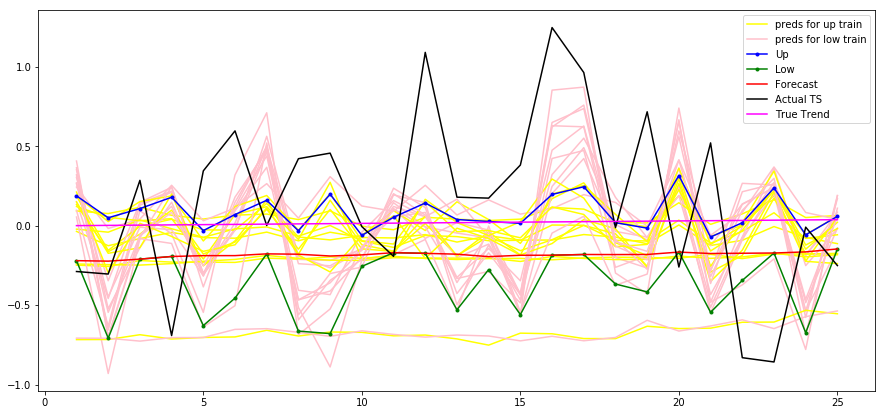

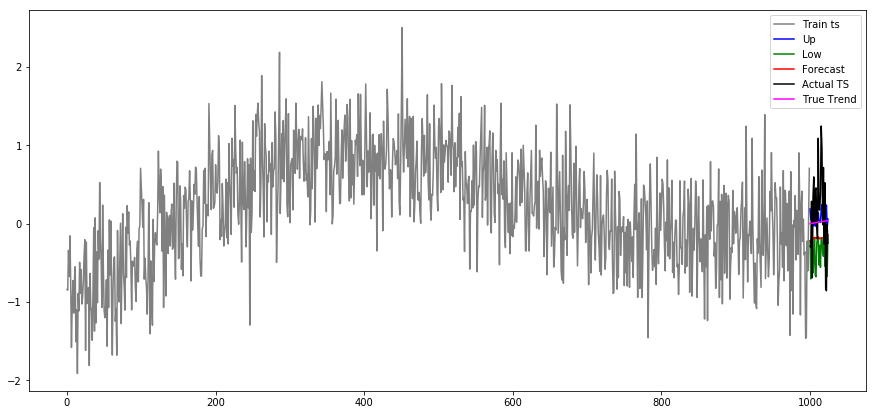

In [16]:
conf_int_plotting(up_predictions = x['up_predictions'],
                  low_predictions = x['low_predictions'],
                  regim='quantile',
                  plot_history = True,
                  plot_up_int = True,
                  plot_low_int = True,
                  plot_trend = True,
                  plot_forecast = True,
                  plot_upper_train = True,
                  plot_lower_train = True,
                  plot_ts_test = True)